In [ ]:
import numpy as np

import plotly.express as px
import plotly.graph_objs as go

from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
pd.options.plotting.backend = "plotly"

import networkx as nx

import hvplot.networkx as hvnx
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

from pyvis.network import Network
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [1376]:
focus_perporty = ["Coupon", "Coupon Frequency", "Bid_Ask_Spread", "Index Price", "Coupon Payment", "Market Value", "Capped Market Value", "Street Yield to Maturity", "Duration", "OAS", "DV 01", "Level 4", "Level 6", "Markit iBoxx Rating", "Daily Return"]

In [1377]:
data = pd.read_excel('iboxx_usd_lq_ig_eod_underlyings_20160125.xlsx')

data["Issuer"].value_counts().head(10).plot(kind='bar', title='Top 10 Issuers by Number of Bonds')

In [1378]:
data_focus = data[focus_perporty]
data_focus.describe()

,Coupon,Coupon Frequency,Bid_Ask_Spread,Index Price,Coupon Payment,Market Value,Capped Market Value,Street Yield to Maturity,Duration,OAS,DV 01,Daily Return
count,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1.482000e+03,1.482000e+03,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000
mean,4.262945,2.000675,0.516719,101.222264,0.341724,1.409609e+09,1.397890e+09,4.059898,8.118080,219.616438,0.081605,0.001654
std,1.476552,0.058100,0.401947,12.070358,0.848498,8.580712e+08,8.276640e+08,2.009845,4.328950,189.655458,0.044047,0.006233
min,1.550000,1.000000,0.005000,40.500000,0.000000,3.340341e+08,3.340341e+08,1.254747,2.432914,7.025699,0.018871,-0.090036
25%,3.125000,2.000000,0.227413,97.950310,0.000000,8.828877e+08,8.797939e+08,2.731016,4.467202,118.167236,0.045390,0.000216
50%,4.125000,2.000000,0.382240,100.752260,0.000000,1.115041e+09,1.113461e+09,3.695697,6.674415,176.737435,0.066411,0.001344
75%,5.125000,2.000000,0.726570,106.511512,0.000000,1.639289e+09,1.615717e+09,4.774581,12.319867,243.453163,0.121186,0.003159
max,9.625000,4.000000,2.616330,145.970290,4.250000,1.194419e+10,1.194419e+10,22.314312,18.678018,2223.477976,0.182024,0.043293


In [1379]:
# AAA, AA, A, BBB, count the number of bonds in each rating
data_focus["Markit iBoxx Rating"].value_counts().plot(kind='bar', title='Number of Bonds by Rating')

In [1380]:
data_focus[data_focus["Markit iBoxx Rating"] == "AAA"].describe()

,Coupon,Coupon Frequency,Bid_Ask_Spread,Index Price,Coupon Payment,Market Value,Capped Market Value,Street Yield to Maturity,Duration,OAS,DV 01,Daily Return
count,30.000000,30.0,30.000000,30.000000,30.0,3.000000e+01,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000
mean,3.415167,2.0,0.529010,101.925668,0.0,1.417661e+09,1.417661e+09,3.154152,9.993445,109.812999,0.101064,0.001458
std,1.112898,0.0,0.344343,8.261345,0.0,6.148635e+08,6.148635e+08,0.995938,5.244215,48.925246,0.051347,0.003405
min,1.819000,2.0,0.033470,88.657890,0.0,7.325528e+08,7.325528e+08,1.640064,2.966944,36.880686,0.030571,-0.013579
25%,2.460250,2.0,0.261180,98.734715,0.0,1.019074e+09,1.019074e+09,2.406479,5.768743,71.731494,0.057850,0.000909
50%,3.437500,2.0,0.483895,100.872180,0.0,1.161333e+09,1.161333e+09,2.933388,8.008644,98.119914,0.079046,0.001554
75%,4.200000,2.0,0.796022,104.737840,0.0,1.632668e+09,1.632668e+09,4.184455,14.513041,154.542734,0.155873,0.003116
max,5.950000,2.0,1.600170,130.241140,0.0,3.110832e+09,3.110832e+09,4.676890,18.678018,198.542179,0.177280,0.007891


In [1381]:
# check the issuer with the most bonds
most_issuer = data["Issuer"].value_counts().idxmax()

# check the most issuer's bonds
most_issuer_bonds = data[data["Issuer"] == most_issuer]
most_issuer_bonds = most_issuer_bonds[focus_perporty]

# do the distribution plot
fig = make_subplots(rows=4, cols=4, subplot_titles=focus_perporty)
for i, col in enumerate(focus_perporty):
    fig.add_trace(go.Histogram(x=most_issuer_bonds[col], name=col), row=i//4+1, col=i%4+1)
fig.update_layout(height=1000, width=1000, title_text=f'Distribution of {most_issuer} Bonds')
fig.show()

In [1382]:
# check the most oas and bid ask spread in the most issuer's bonds
fig = make_subplots(rows=1, cols=2, subplot_titles=["OAS", "Bid_Ask_Spread"])
fig.add_trace(go.Histogram(x=most_issuer_bonds["OAS"], name="OAS"), row=1, col=1)
fig.add_trace(go.Histogram(x=most_issuer_bonds["Bid_Ask_Spread"], name="Bid_Ask_Spread"), row=1, col=2)
fig.update_layout(height=500, width=1000, title_text=f'Distribution of OAS and Bid_Ask_Spread in {most_issuer} Bonds')
fig.show()

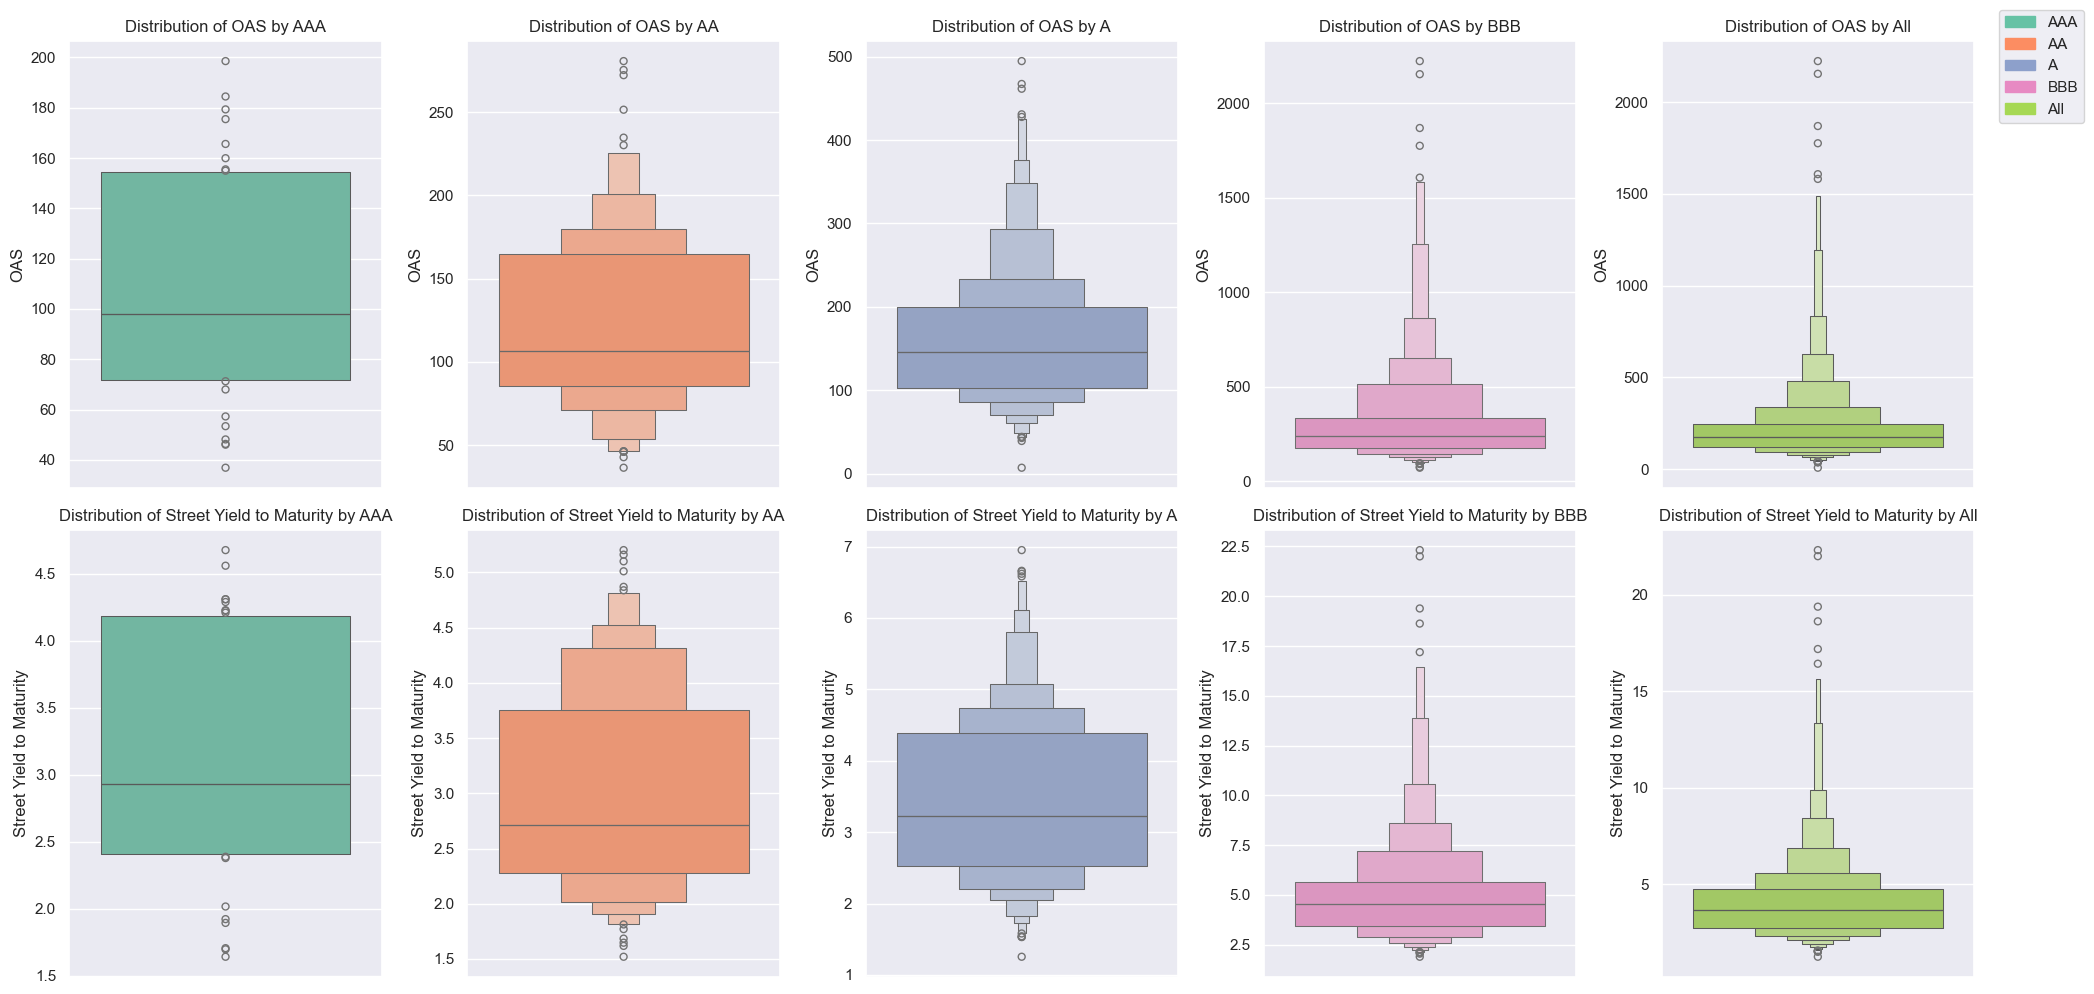

In [1383]:
import matplotlib.patches as mpatches
focus_perporty_AAA = data_focus[data_focus["Markit iBoxx Rating"] == "AAA"]
focus_perporty_AA = data_focus[data_focus["Markit iBoxx Rating"] == "AA"]
focus_perporty_A = data_focus[data_focus["Markit iBoxx Rating"] == "A"]
focus_perporty_BBB = data_focus[data_focus["Markit iBoxx Rating"] == "BBB"]

# Create a figure and a grid of subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 10))  # Adjusted for clarity
colors = sns.color_palette("Set2", 5)
list_name = ["AAA", "AA", "A", "BBB", "All"]
data = [focus_perporty_AAA, focus_perporty_AA, focus_perporty_A, focus_perporty_BBB, data_focus]

for i in range(0, 5):
    row = i // 5  # Calculate row index
    col = i % 5  # Calculate column index
    title1 = "OAS"
    title2 = list_name[i]
    title = f"Distribution of {title1} by {title2}"
    sns.boxenplot(
        data=data[i], y="OAS", ax=axs[row, col], color=colors[i], legend=False
    ).set_title(title)
    
for i in range(5, 10):
    row = i // 5
    col = i % 5
    title1 = "Street Yield to Maturity"
    title2 = list_name[i-5]  # Adjust index for the second set of plots
    title = f"Distribution of {title1} by {title2}"
    sns.boxenplot(
        data=data[i-5], y="Street Yield to Maturity", ax=axs[row, col], color=colors[i-5], legend=False
    ).set_title(title)

legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, list_name)]
fig.legend(handles=legend_handles, loc='upper right', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()


In [1384]:
# list the bonds with the highest OAS
most_issuer_bonds.sort_values(by="Bid_Ask_Spread", ascending=False).head(10)

,Coupon,Coupon Frequency,Bid_Ask_Spread,Index Price,Coupon Payment,Market Value,Capped Market Value,Street Yield to Maturity,Duration,OAS,DV 01,Level 4,Level 6,Markit iBoxx Rating,Daily Return
99,5.600,2,1.83980,114.05880,2.8,1.998751e+09,1.861735e+09,4.652118,14.589358,211.211507,0.161940,Financials,Banks,A,0.003333
151,5.400,2,1.36046,113.13548,2.7,1.417756e+09,1.320567e+09,4.533635,14.921059,197.225073,0.164423,Financials,Banks,A,0.002879
1393,5.625,2,0.92010,108.87233,0.0,1.391959e+09,1.296539e+09,5.026473,14.527945,246.537676,0.156454,Financials,Banks,A,0.005453
1356,5.500,2,0.86289,112.93417,0.0,1.430774e+09,1.332693e+09,4.616716,14.266355,208.939468,0.158946,Financials,Banks,A,0.016889
953,4.950,2,0.86227,99.22210,0.0,1.749380e+09,1.629459e+09,5.000407,15.606116,238.717920,0.150422,Financials,Banks,A,-0.000019
900,6.400,2,0.79275,122.67503,0.0,3.097987e+09,2.885617e+09,4.741261,13.037035,229.888457,0.157747,Financials,Banks,A,0.016226
648,4.850,2,0.71352,105.75592,0.0,1.081001e+09,1.006897e+09,4.486978,15.607618,186.539205,0.163432,Financials,Banks,A,0.007660
84,4.625,2,0.51810,108.06977,0.0,2.180666e+09,2.031179e+09,2.965133,4.738020,145.966463,0.051585,Financials,Banks,A,0.001165
281,4.125,2,0.46682,98.69228,0.0,1.983012e+09,1.847075e+09,4.276039,8.824853,224.952687,0.087070,Financials,Banks,A,0.005628
1159,4.350,2,0.36770,106.40833,0.0,3.250250e+09,3.027442e+09,3.085630,4.926572,153.860392,0.053313,Financials,Banks,A,0.001315


In [1385]:
data = pd.read_excel('iboxx_usd_lq_ig_eod_underlyings_20160125.xlsx')
major_data = data[['Issuer', 
                    'Coupon', 
                    'Final Maturity', 
                    'Expected Remaining Life', 
                    'Coupon Frequency', 
                    'Bid Price', 
                    'Ask Price', 
                    'Bid_Ask_Spread', 
                    'Index Price', 
                    'Coupon Payment', 
                    'Notional Amount',
                    'Market Value',
                    'Capped Market Value',
                    'Street Yield to Maturity',
                    'Duration',
                    'OAS',
                    'DV 01',
                    'Level 3',
                    'Level 4',
                    'Level 5',
                    'Level 6',
                    'Level 7',
                    'Level 8',
                    'Markit iBoxx Rating',
                    'Daily Return',
                    'Month-to-Date Return',
                    'Year-to-Date Return']]

major_data.loc[:, 'Final Maturity'] = pd.to_datetime(major_data['Final Maturity'])

In [1386]:
def prepare_encode_data(target_columns):
    data = major_data[target_columns].copy()
    
    for column in target_columns[1:]:
        data.loc[:, column] = data[column].astype('category').cat.codes
        
    renamed_columns = {column: 'L' + column[-1] + '_encode' for column in target_columns[1:]}
    data = data.rename(columns = renamed_columns)
    return data

def prepare_detail_data(target_columns):
    data = major_data[target_columns].copy()
    renamed_columns = {column: 'L' + column[-1] + '_detail' for column in target_columns[1:]}
    data = data.rename(columns = renamed_columns)
    return data

def join_encoded_data(target_datas):
    final_data = pd.concat(target_datas, axis = 1)
    final_data = final_data.loc[:,~final_data.columns.duplicated()]
    return final_data

def prepare_levels():
    target_columns = ['Issuer', 'Level 3', 'Level 4', 'Level 5', 'Level 6', 'Level 7', 'Level 8']
    encode_data = prepare_encode_data(target_columns)
    detail_data = prepare_detail_data(target_columns)
    target_datas = [encode_data, detail_data]
    final_data = join_encoded_data(target_datas)
    return final_data

levels = prepare_levels()
levels.head()

,Issuer,L3_encode,L4_encode,L5_encode,L6_encode,L7_encode,L8_encode,L3_detail,L4_detail,L5_detail,L6_detail,L7_detail,L8_detail
0,ANADARKO FINANCE CO,0,1,6,10,25,26,Corporates,Non-Financials,Oil & Gas,Oil & Gas,Oil & Gas Producers,Exploration & Production
1,Verizon Global Funding Corp,0,1,8,15,6,29,Corporates,Non-Financials,Telecommunications,Telecommunications,Fixed Line Telecommunications,Fixed Line Telecommunications
2,New Cingular Wireless Services Inc,0,1,8,15,23,48,Corporates,Non-Financials,Telecommunications,Telecommunications,Mobile Telecommunications,Mobile Telecommunications
3,Orange SA,0,1,8,15,6,29,Corporates,Non-Financials,Telecommunications,Telecommunications,Fixed Line Telecommunications,Fixed Line Telecommunications
4,DEVON FINANCING CORP ULC,0,1,6,10,25,26,Corporates,Non-Financials,Oil & Gas,Oil & Gas,Oil & Gas Producers,Exploration & Production


In [1387]:
data_without_levels = major_data.drop(['Issuer', 'Level 3', 'Level 4', 'Level 5', 'Level 6', 'Level 7', 'Level 8'], axis = 1)
data_without_levels["spread_market_value"] = data_without_levels["Market Value"] - data_without_levels["Capped Market Value"]
data_without_levels = data_without_levels.drop(["Market Value", "Capped Market Value"], axis = 1)

In [1388]:
data_without_levels["mid_price"] = (data_without_levels["Bid Price"] + data_without_levels["Ask Price"]) / 2
data_without_levels["half_spread"] = data_without_levels["Bid_Ask_Spread"] / 2

# Marketing Rating analysis

In [1389]:
market_rating = data_without_levels.copy()
list_rating = data_without_levels['Markit iBoxx Rating'].unique()

market_rating_AAA = market_rating[market_rating['Markit iBoxx Rating'] == 'AAA']
market_rating_AA = market_rating[market_rating['Markit iBoxx Rating'] == 'AA']
market_rating_A = market_rating[market_rating['Markit iBoxx Rating'] == 'A']
market_rating_BBB = market_rating[market_rating['Markit iBoxx Rating'] == 'BBB']

## check the bond type of the AAA rating from the data

In [1390]:
def check_bond_type(data, rating):
    callable_bond_type = data[data['Markit iBoxx Rating'] == rating]['is Callable'].value_counts()
    fixed_bond_type = data[data['Markit iBoxx Rating'] == rating]['Is Fixed to Float'].value_counts()
    perpetual_bond_type = data[data['Markit iBoxx Rating'] == rating]['Is Perpetual'].value_counts()
    hybrid_bond_type = data[data['Markit iBoxx Rating'] == rating]['Is Hybrid Capital'].value_counts()
    core_bond_type = data[data['Markit iBoxx Rating'] == rating]['Is Core index'].value_counts()
    crossover_bond_type = data[data['Markit iBoxx Rating'] == rating]['Is Crossover'].value_counts()
    frn_bond_type = data[data['Markit iBoxx Rating'] == rating]['Is FRN'].value_counts()
    pik_bond_type = data[data['Markit iBoxx Rating'] == rating]['Is PIK'].value_counts()
    zero_bond_type = data[data['Markit iBoxx Rating'] == rating]['Is Zero Coupon'].value_counts()
    sink_bond_type = data[data['Markit iBoxx Rating'] == rating]['Is Sinking'].value_counts()
    
    print(f"{rating} bond type analysis:")
    print("-----------------------------------")
    print("Callable bond: \n", callable_bond_type[1] if 1 in callable_bond_type else 0)
    print("Fixed to Float bond: \n", fixed_bond_type[1] if 1 in fixed_bond_type else 0)
    print("Perpetual bond: \n", perpetual_bond_type[1] if 1 in perpetual_bond_type else 0)
    print("Hybrid Capital bond: \n", hybrid_bond_type[1] if 1 in hybrid_bond_type else 0)
    print("Core index bond: \n", core_bond_type[1] if 1 in core_bond_type else 0)
    print("Crossover bond: \n", crossover_bond_type[1] if 1 in crossover_bond_type else 0)
    print("FRN bond: \n", frn_bond_type[1] if 1 in frn_bond_type else 0)
    print("PIK bond: \n", pik_bond_type[1] if 1 in pik_bond_type else 0)
    print("Zero Coupon bond: \n", zero_bond_type[1] if 1 in zero_bond_type else 0)
    print("Sinking bond: \n", sink_bond_type[1] if 1 in sink_bond_type else 0)
    print("Total bond: \n", data[data['Markit iBoxx Rating'] == rating].shape[0])
    print("-----------------------------------")
    
check_bond_type(data, 'AAA')
check_bond_type(data, 'AA')
check_bond_type(data, 'A')
check_bond_type(data, 'BBB')

AAA bond type analysis:
-----------------------------------
Callable bond: 
 21
Fixed to Float bond: 
 0
Perpetual bond: 
 0
Hybrid Capital bond: 
 0
Core index bond: 
 0
Crossover bond: 
 0
FRN bond: 
 0
PIK bond: 
 0
Zero Coupon bond: 
 0
Sinking bond: 
 0
Total bond: 
 30
-----------------------------------
AA bond type analysis:
-----------------------------------
Callable bond: 
 28
Fixed to Float bond: 
 0
Perpetual bond: 
 0
Hybrid Capital bond: 
 0
Core index bond: 
 0
Crossover bond: 
 0
FRN bond: 
 0
PIK bond: 
 0
Zero Coupon bond: 
 0
Sinking bond: 
 0
Total bond: 
 183
-----------------------------------
A bond type analysis:
-----------------------------------
Callable bond: 
 192
Fixed to Float bond: 
 0
Perpetual bond: 
 0
Hybrid Capital bond: 
 43
Core index bond: 
 0
Crossover bond: 
 0
FRN bond: 
 0
PIK bond: 
 0
Zero Coupon bond: 
 0
Sinking bond: 
 0
Total bond: 
 633
-----------------------------------
BBB bond type analysis:
-----------------------------------
Cal

In [1391]:
data_without_levels['general_bid_ask_spread_std'] = data_without_levels['Bid_Ask_Spread'].std()
data_without_levels['bid_ask_spread_std'] = data_without_levels['Bid_Ask_Spread'] - data_without_levels['general_bid_ask_spread_std'].mean()
data_without_levels['normalized_bid_ask_spread'] = data_without_levels['bid_ask_spread_std'] / data_without_levels['Bid_Ask_Spread'].std()

In [1392]:
market_rating_BBB = data_without_levels[data_without_levels['Markit iBoxx Rating'] == 'BBB']
market_rating_A = data_without_levels[data_without_levels['Markit iBoxx Rating'] == 'A']
market_rating_AA = data_without_levels[data_without_levels['Markit iBoxx Rating'] == 'AA']
market_rating_AAA = data_without_levels[data_without_levels['Markit iBoxx Rating'] == 'AAA']

In [1393]:
fig = make_subplots(rows=2, cols=2, subplot_titles=['BBB', 'A', 'AA', 'AAA'])
fig.add_trace(go.Histogram(x=market_rating_BBB['normalized_bid_ask_spread'], name='BBB'), row=1, col=1)
fig.add_trace(go.Histogram(x=market_rating_A['normalized_bid_ask_spread'], name='A'), row=1, col=2)
fig.add_trace(go.Histogram(x=market_rating_AA['normalized_bid_ask_spread'], name='AA'), row=2, col=1)
fig.add_trace(go.Histogram(x=market_rating_AAA['normalized_bid_ask_spread'], name='AAA'), row=2, col=2)
fig.update_layout(height=800, width=800, title_text='Normalized Bid_Ask_Spread Distribution')

fig.show()

In [1394]:
# plot the histogram
def plot_in_general_histogram(data1, data2, data3, data4, column, bins, xlabel, ylabel, title):
    trace1 = go.Histogram(x=data1[column], nbinsx=bins, name='BBB', opacity=0.5, marker_color='#FFA07A')  # Light Salmon
    trace2 = go.Histogram(x=data2[column], nbinsx=bins, name='A', opacity=0.5, marker_color='#20B2AA')    # Light Sea Green
    trace3 = go.Histogram(x=data3[column], nbinsx=bins, name='AA', opacity=0.5, marker_color='#ADD8E6')   # Light Blue
    trace4 = go.Histogram(x=data4[column], nbinsx=bins, name='AAA', opacity=0.5, marker_color='#778899')  # Light Slate Gray
    
    fig = go.Figure(data=[trace1, trace2, trace3, trace4])
    fig.update_layout(
        title=title,
        xaxis_title=xlabel,
        yaxis_title=ylabel,
        barmode='overlay', 
    )
    return fig
    
def plot_multiple(metrics, data, rows, cols):
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=metrics)

    colors = {
        'BBB': '#FFA07A',
        'A': '#20B2AA',
        'AA': '#ADD8E6',
        'AAA': '#778899'
    }
    
    for i, metric in enumerate(metrics):
        row = (i // cols) + 1
        col = (i % cols) + 1

        show_legend = (row == 1 and col == 1)

        fig.add_trace(
            go.Histogram(x=data[0][metric], nbinsx=50, name='BBB', opacity=0.5, marker_color=colors['BBB'], showlegend=show_legend),
            row=row, col=col)
        fig.add_trace(
            go.Histogram(x=data[1][metric], nbinsx=50, name='A', opacity=0.5, marker_color=colors['A'], showlegend=show_legend),
            row=row, col=col)
        fig.add_trace(
            go.Histogram(x=data[2][metric], nbinsx=50, name='AA', opacity=0.5, marker_color=colors['AA'], showlegend=show_legend),
            row=row, col=col)
        fig.add_trace(
            go.Histogram(x=data[3][metric], nbinsx=50, name='AAA', opacity=0.5, marker_color=colors['AAA'], showlegend=show_legend),
            row=row, col=col)
    
    fig.update_layout(
        title_text='Multiple Metrics Distributions',
        barmode='overlay',
        height=250*rows,
        width=300*cols,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    
    for i in range(1, rows*cols+1):
        fig.update_yaxes(title_text='Frequency', row=i, col=1)
    
    # for i in range(1, rows*cols+1):
    #     fig.update_yaxes(title_text='Frequency', row=row, col=col)
    
    fig.show()

In [1395]:
metrics = ['Coupon', 'Daily Return', 'Street Yield to Maturity', 'Bid_Ask_Spread' , 'spread_market_value', 'Duration', 'OAS', 'DV 01']
rating_data = (market_rating_BBB, market_rating_A, market_rating_AA, market_rating_AAA)


In [1396]:
plot_multiple(metrics, rating_data, 3, 3)

In [1397]:
data_without_levels

,Coupon,Final Maturity,Expected Remaining Life,Coupon Frequency,Bid Price,Ask Price,Bid_Ask_Spread,Index Price,Coupon Payment,Notional Amount,...,Markit iBoxx Rating,Daily Return,Month-to-Date Return,Year-to-Date Return,spread_market_value,mid_price,half_spread,general_bid_ask_spread_std,bid_ask_spread_std,normalized_bid_ask_spread
0,7.500,2031-01-05 00:00:00,15.266667,2,91.89515,93.93203,2.03688,91.89515,0.00,900000000,...,BBB,0.010173,-0.151373,-0.151373,0.0,92.913590,1.018440,0.401947,1.634933,4.067530
1,7.750,2030-01-12 00:00:00,14.850000,2,128.88048,129.62254,0.74206,128.88048,0.00,1206000000,...,BBB,-0.012732,0.009494,0.009494,266848560.0,129.251510,0.371030,0.401947,0.340113,0.846163
2,8.750,2031-01-03 00:00:00,15.100000,2,139.80405,141.13264,1.32859,139.80405,0.00,822102000,...,BBB,0.002286,0.026708,0.026708,0.0,140.468345,0.664295,0.401947,0.926643,2.305384
3,9.000,2031-01-03 00:00:00,15.100000,2,139.32155,140.62829,1.30674,139.32155,0.00,2500000000,...,BBB,0.002277,-0.009769,-0.009769,0.0,139.974920,0.653370,0.401947,0.904793,2.251024
4,7.875,2031-09-30 00:00:00,15.680556,2,94.21650,95.32761,1.11111,94.21650,0.00,1250000000,...,BBB,0.002410,-0.037288,-0.037288,0.0,94.772055,0.555555,0.401947,0.709163,1.764318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,2.650,2022-03-11 00:00:00,6.772222,2,101.14301,101.32552,0.18251,101.14301,0.00,1000000000,...,AAA,0.001326,0.013891,0.013891,0.0,101.234265,0.091255,0.401947,-0.219437,-0.545935
1478,5.700,2036-12-14 00:00:00,20.886111,2,112.47667,113.19231,0.71564,112.47667,0.00,750000000,...,A,0.002382,0.006920,0.006920,0.0,112.834490,0.357820,0.401947,0.313693,0.780433
1479,6.000,2037-01-15 00:00:00,20.972222,2,83.87674,85.59413,1.71739,83.87674,3.00,1000000000,...,BBB,-0.027238,-0.119721,-0.119721,0.0,84.735435,0.858695,0.401947,1.315443,3.272675
1480,5.875,2027-05-04 00:00:00,11.194444,2,123.52067,124.58020,1.05953,123.52067,0.00,750000000,...,AA,0.002935,0.012744,0.012744,0.0,124.050435,0.529765,0.401947,0.657583,1.635993


## Financial and Non-Financial Comparision

In [1398]:
financial_data = data[data["Level 4"] == "Financials"]
non_financial_data = data[data["Level 4"] == "Non-Financials"]

In [1399]:
def find_unique_columns(data, target_column):
    hashtable_catorical = {}
    list_catorical = data[target_column].unique()
    for catorical in list_catorical:
        hashtable_catorical[catorical] = data[target_column].value_counts()[catorical]
    return hashtable_catorical

In [1400]:
def plot_pie_chart(data, target_column, title):
    hashtable_catorical = find_unique_columns(data, target_column)
    fig = px.pie(values=list(hashtable_catorical.values()), names=list(hashtable_catorical.keys()), title=title, width=800, height=800)
    return fig

In [1401]:
def plot_pie_chart_subplots(data1, data2, target_column, title1, title2):
    hashtable_catorical1 = find_unique_columns(data1, target_column)
    hashtable_catorical2 = find_unique_columns(data2, target_column)
    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    fig.add_trace(go.Pie(labels=list(hashtable_catorical1.keys()), values=list(hashtable_catorical1.values()), name=title1), 1, 1)
    fig.add_trace(go.Pie(labels=list(hashtable_catorical2.keys()), values=list(hashtable_catorical2.values()), name=title2), 1, 2)
    # add text info down below the pie chart
    fig.update_layout(
        annotations=[dict(text=title1, x=0.175, y=-.15, font_size=20, showarrow=False),
                     dict(text=title2, x=0.868, y=-.15, font_size=20, showarrow=False)]
    )
    fig.update_traces(hole=.4, hoverinfo="label+percent+name")
    fig.update_layout(title_text="Rating Distribution in Financials (Left) and Non-Financials (Right)")

    return fig

plot_pie_chart_subplots(financial_data, non_financial_data, "Markit iBoxx Rating", "Financials", "Non-Financials")


In [1402]:
# Distrubtion by bond rating

def plot_numerical_by_category(data, column_names, category_name, quantile=0.25, plot_type="distribution"):
    # Determine the layout of the subplots
    n = len(column_names)
    rows = int(n ** 0.5) + (1 if n % int(n ** 0.5) > 0 else 0)
    cols = int(n / rows) + (1 if n % rows > 0 else 0)
    
    # Create a figure and a grid of subplots
    fig, axs = plt.subplots(rows, cols, figsize=(6*cols, 6*rows))
    axs = axs.flatten() # Flatten the array of axes for easy iteration

    for i, column in enumerate(column_names):
        # Set title for each subplot
        title = f"Distribution of {column} by {category_name}"
        
        sns.kdeplot(
            data=data, x=column, hue=category_name, ax=axs[i], fill=True
        )
        
        axs[i].set_title(title)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

target_columns = ['Coupon', 'Bid_Ask_Spread', 'Street Yield to Maturity', 'OAS', 'Daily Return', 'Duration']        

In [1403]:
# linear regression
from sklearn.linear_model import LinearRegression

def plot_linear_regression(data, x_column, y_column, rating_list):
    fig = px.scatter(data, x=x_column, y=y_column, color="Markit iBoxx Rating")
    for rating in rating_list:
        if rating in data["Markit iBoxx Rating"].values:
            y_axis = data[data["Markit iBoxx Rating"] == rating][y_column].values.reshape(-1, 1)
            x_axis = data[data["Markit iBoxx Rating"] == rating][x_column].values.reshape(-1, 1)
            reg = LinearRegression().fit(x_axis, y_axis)
            fig.add_trace(go.Scatter(x=x_axis.flatten(), y=reg.predict(x_axis).flatten(), mode='lines', name=f'{rating} OAS Line'))
    fig.show()

plot_linear_regression(data, "Bid_Ask_Spread", "OAS", ["AAA", "AA", "A", "BBB"])
plot_linear_regression(data, "Street Yield to Maturity", "OAS", ["AAA", "AA", "A", "BBB"])

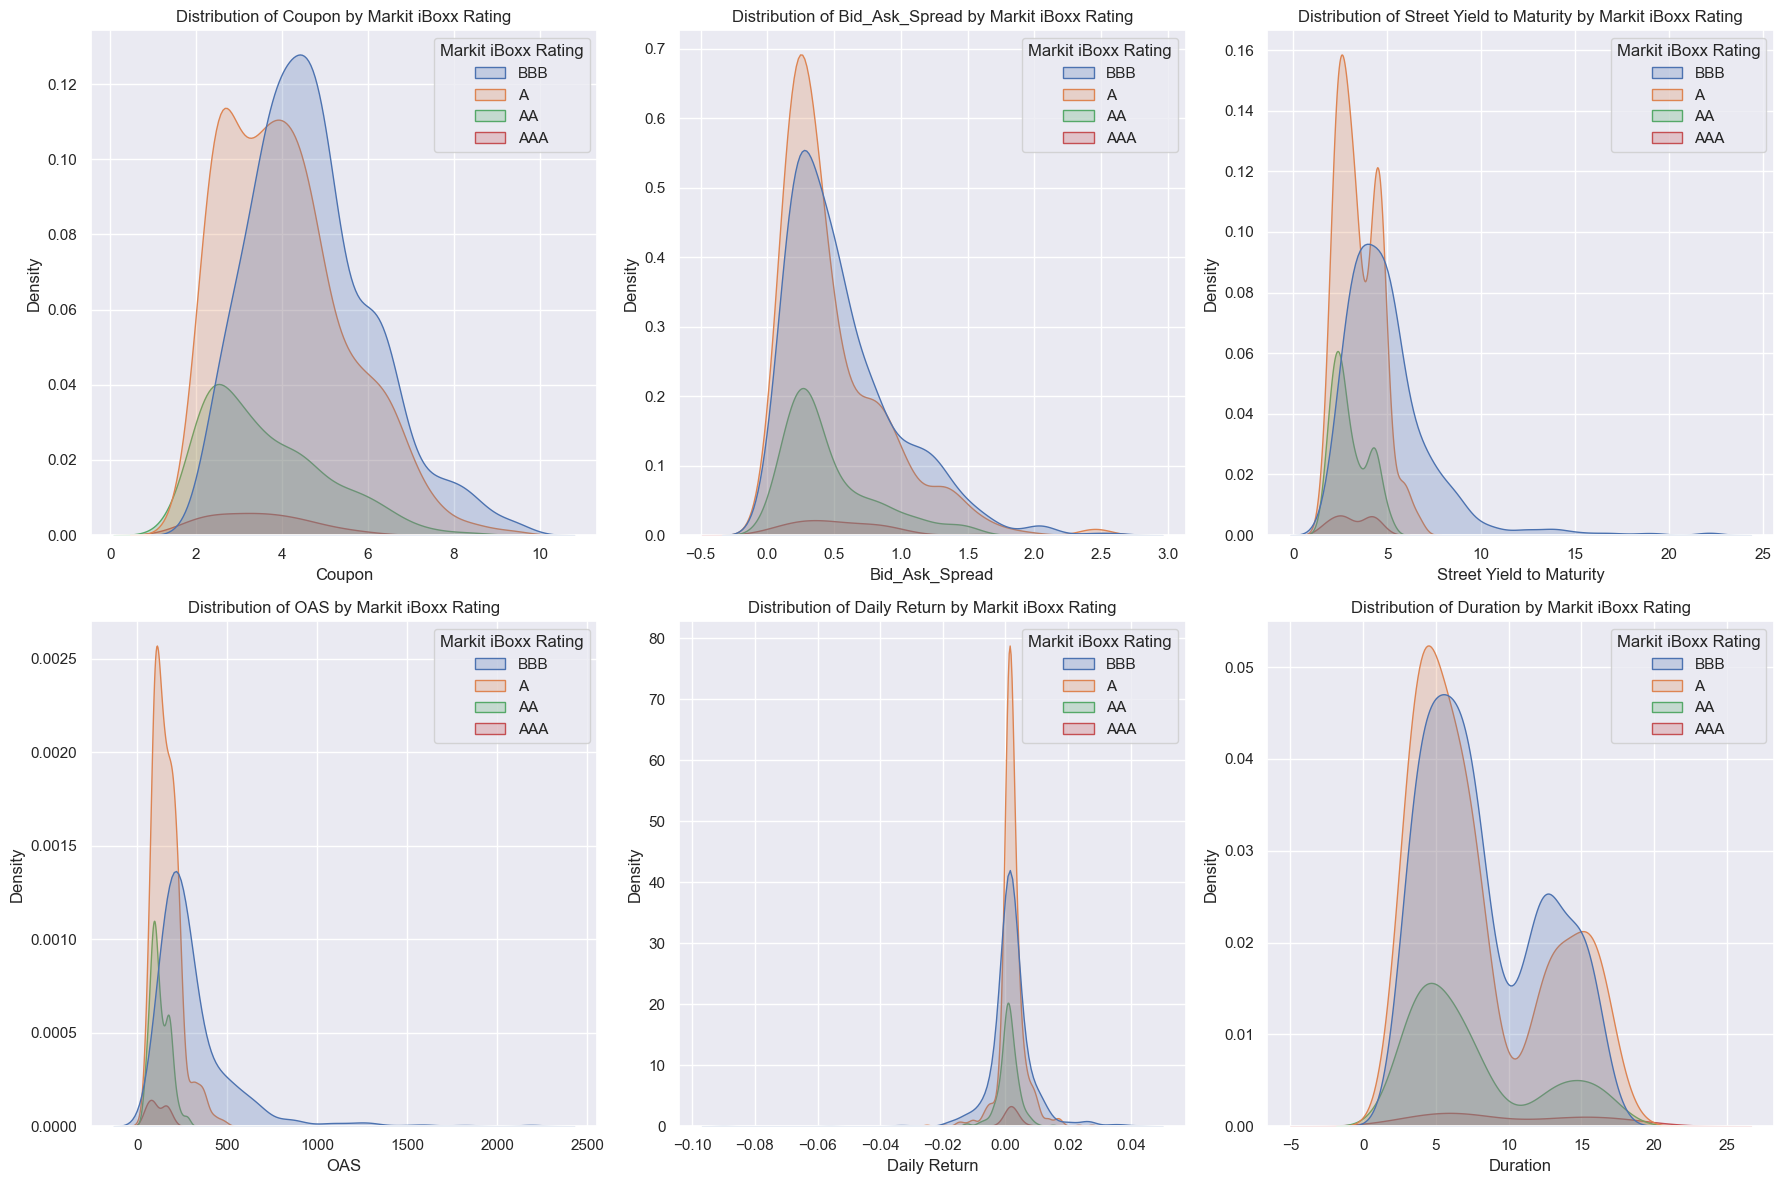

In [1404]:
plot_numerical_by_category(data, target_columns, 'Markit iBoxx Rating')

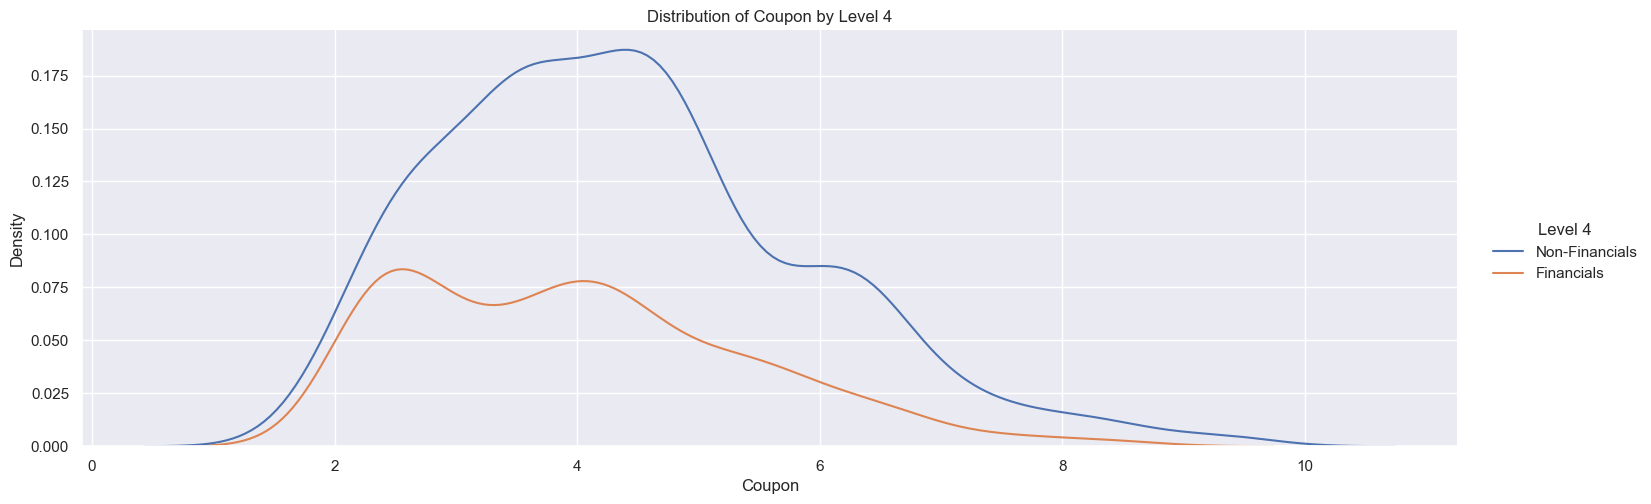

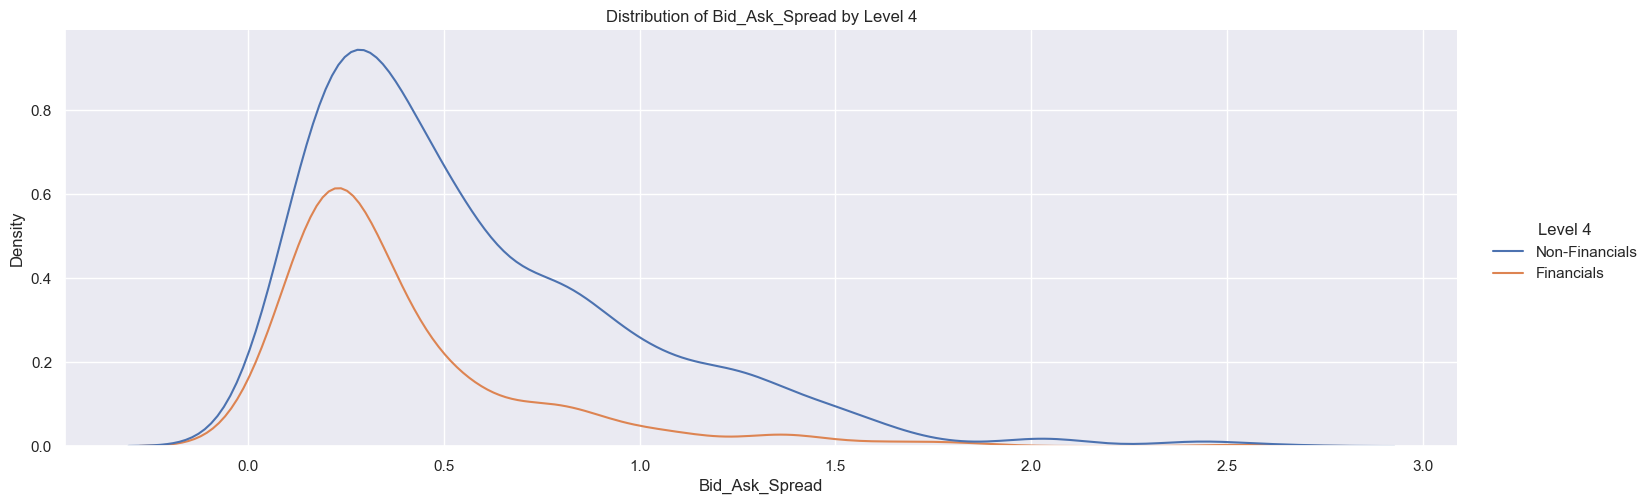

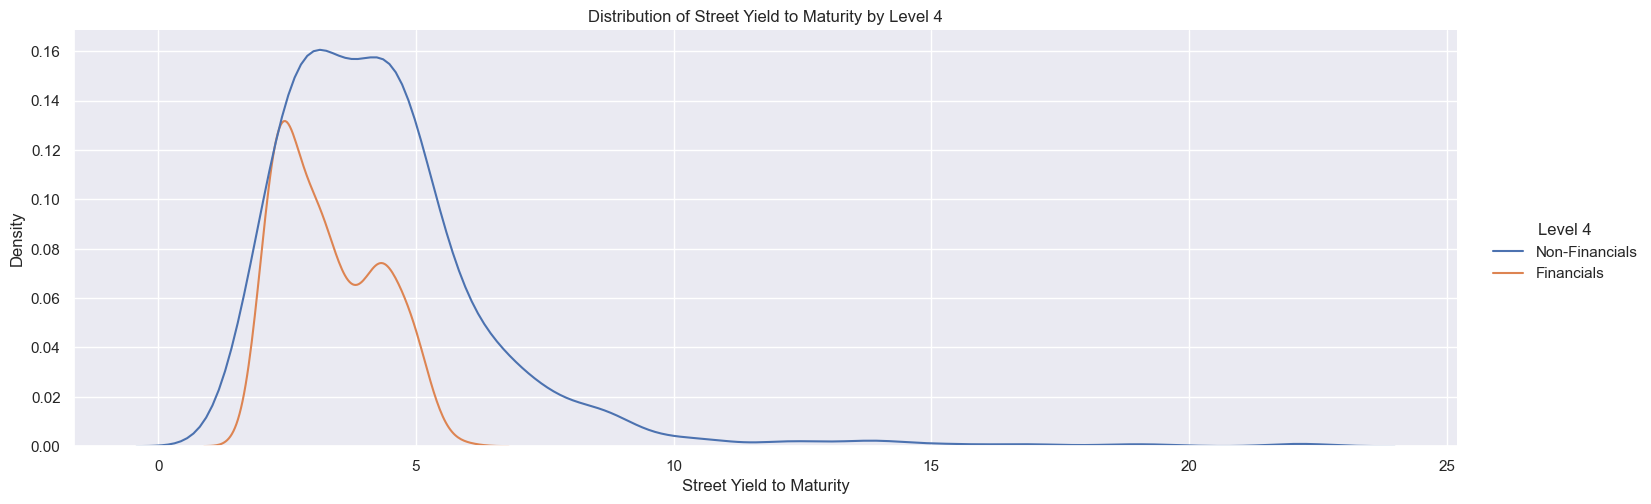

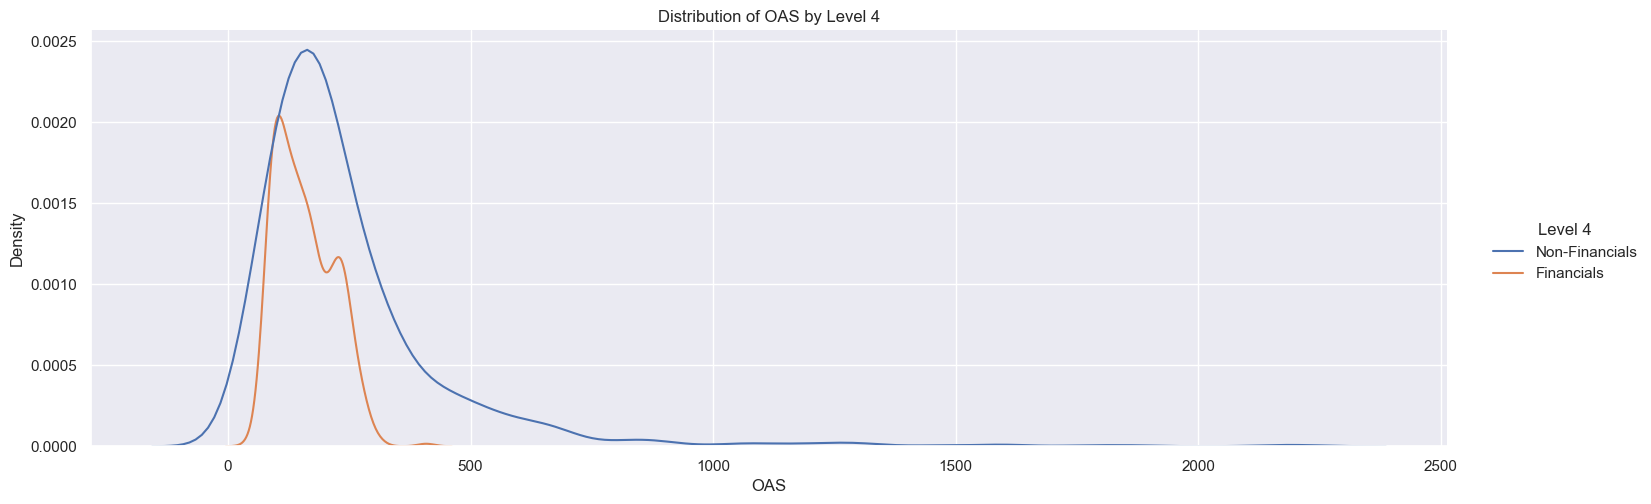

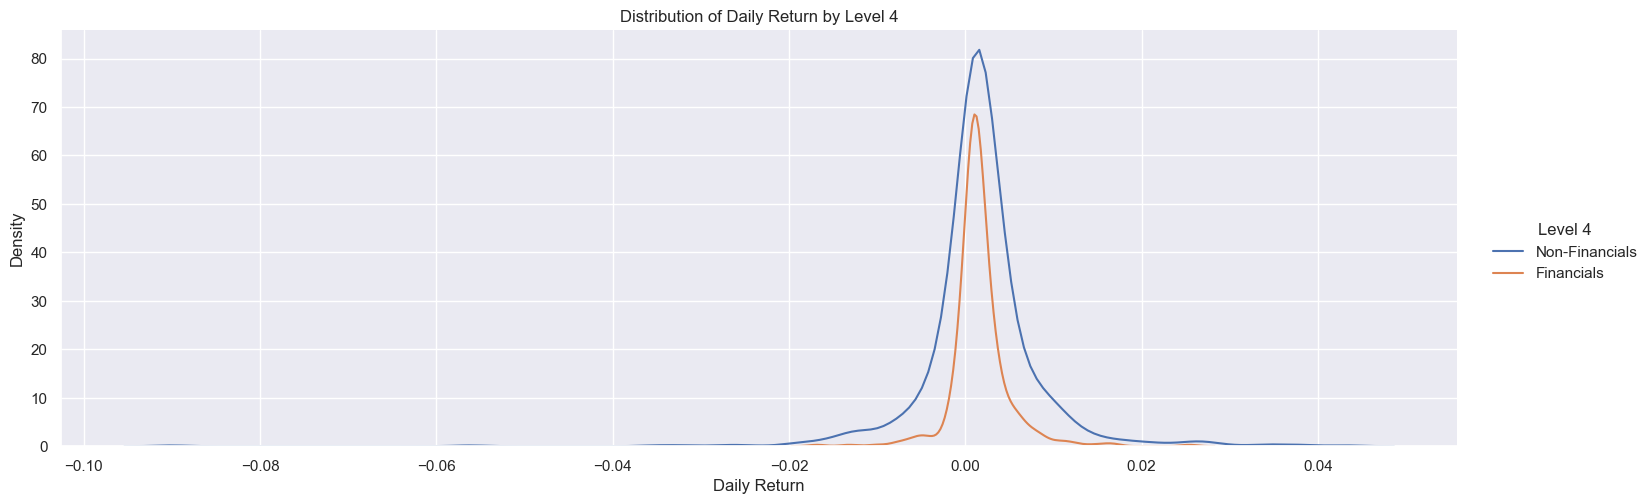

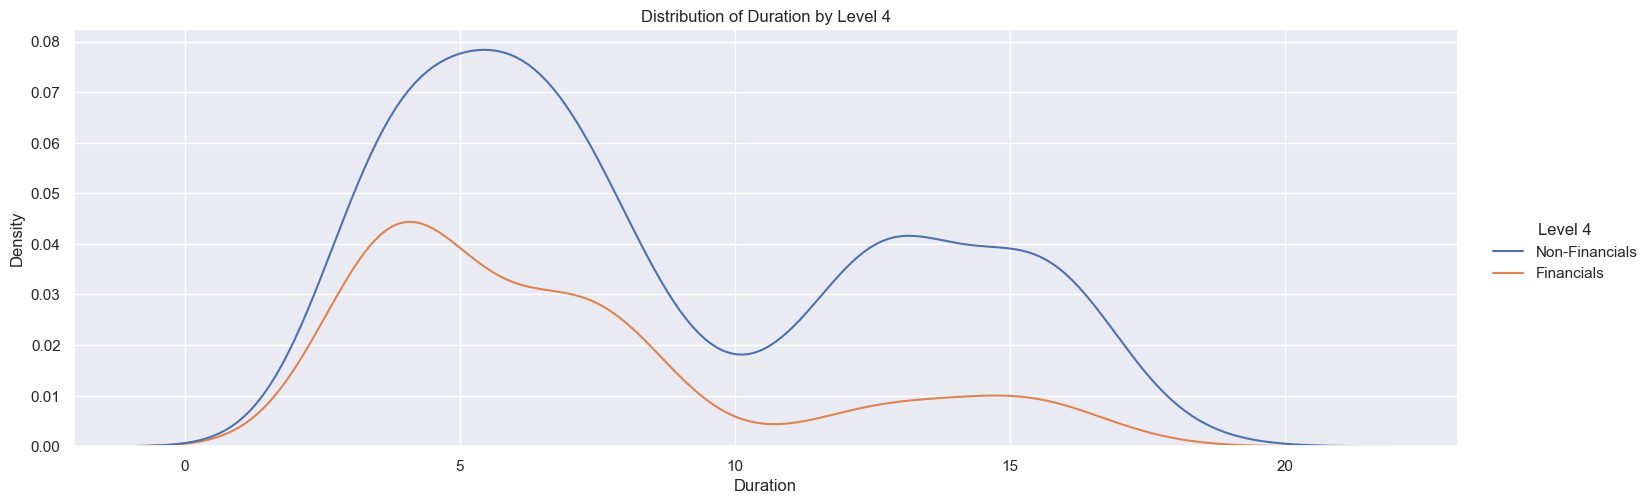

In [1405]:
plot_numerical_by_caotry(data, target_columns, 'Level 4', type="distribution")

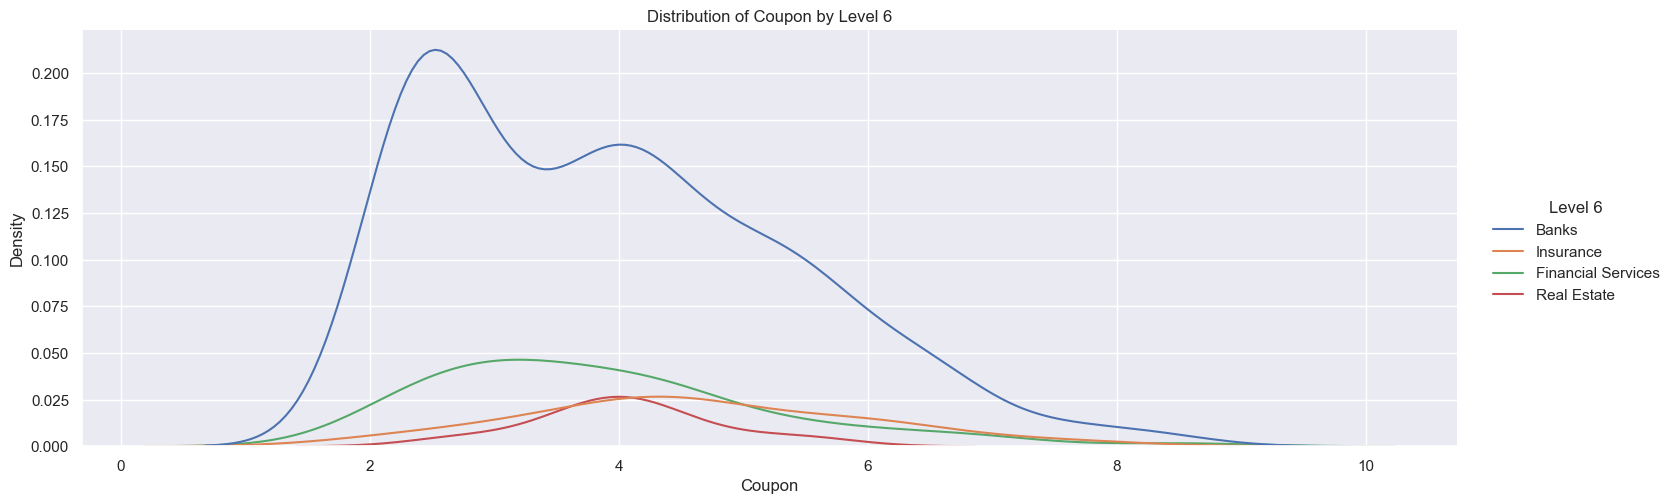

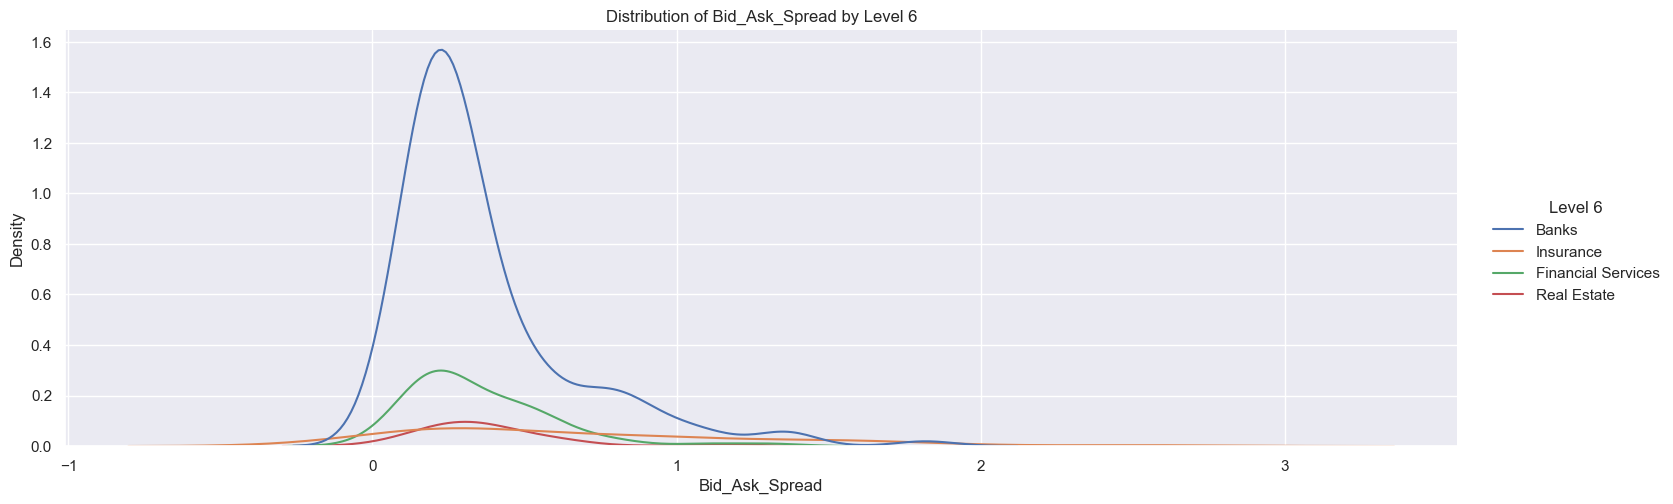

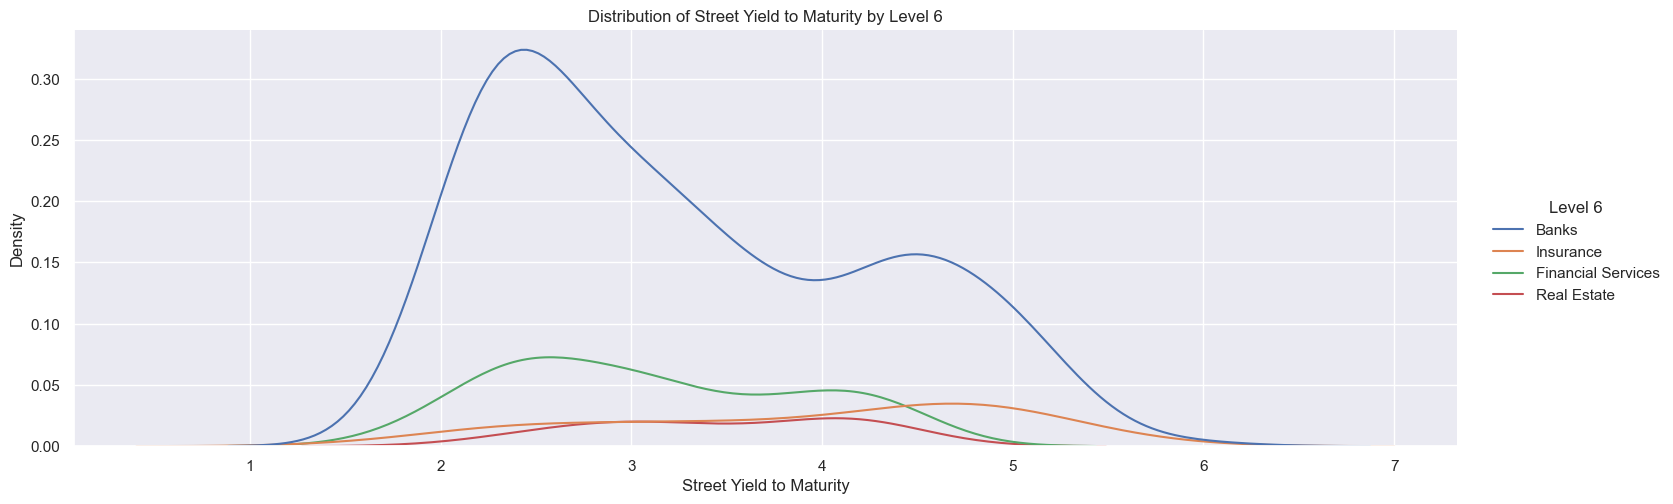

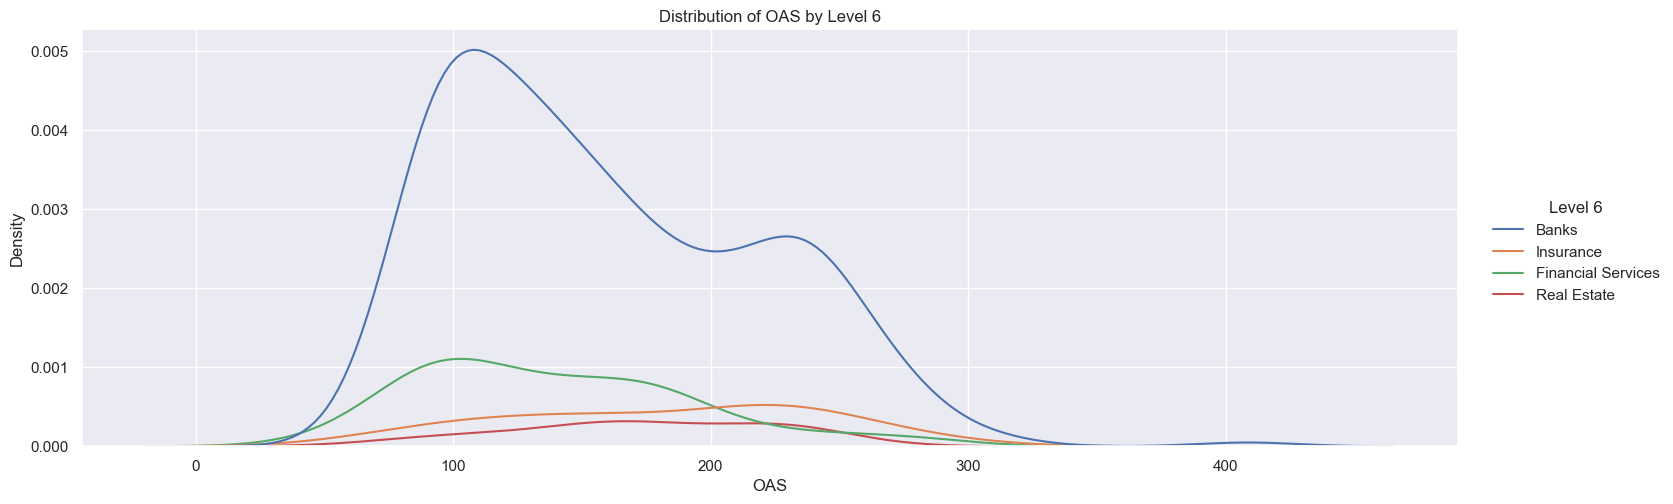

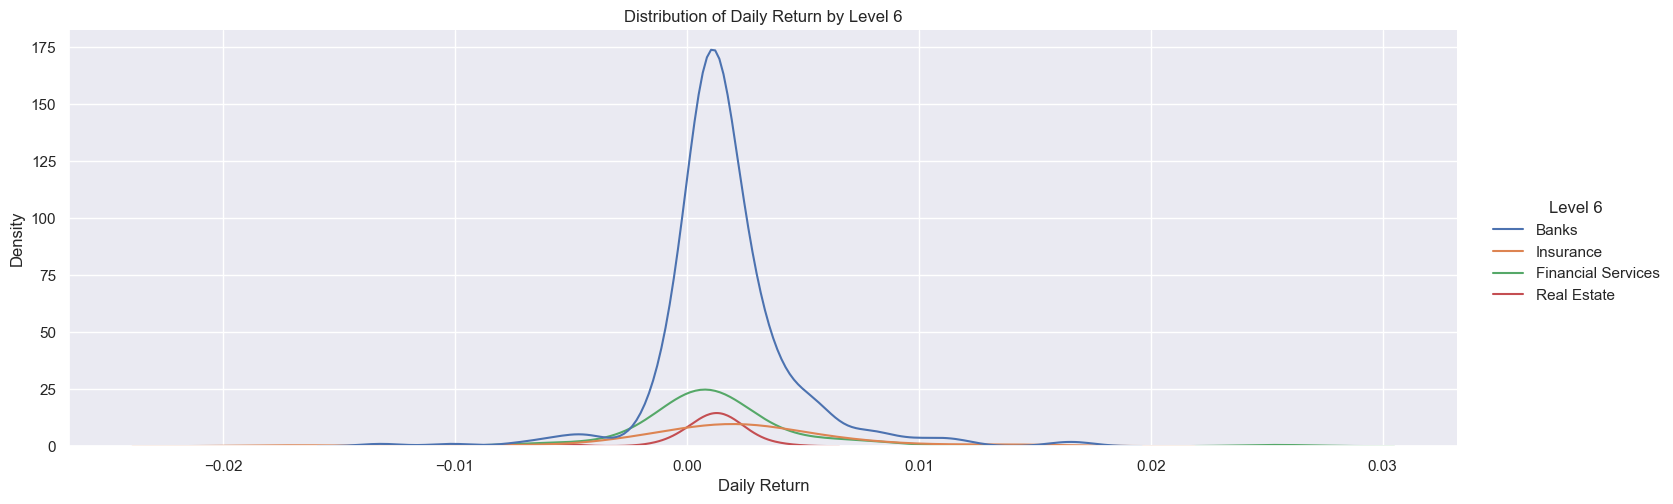

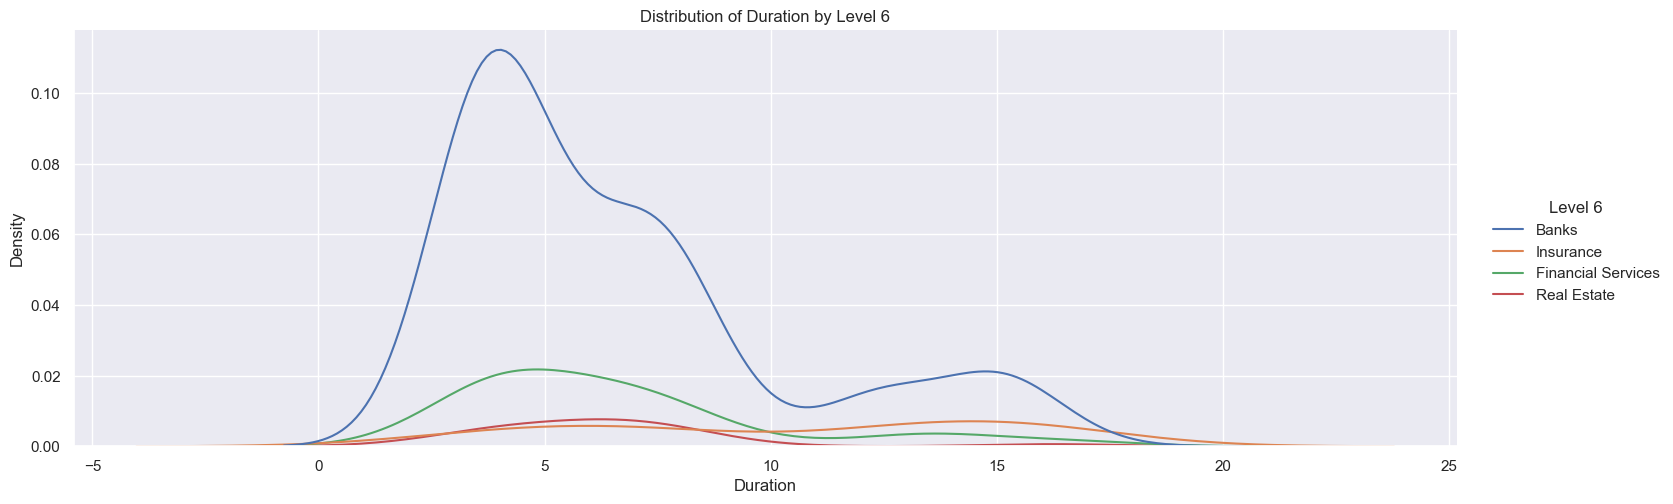

In [1406]:
plot_numerical_by_caotry(financial_data, target_columns, 'Level 6', type="distribution")

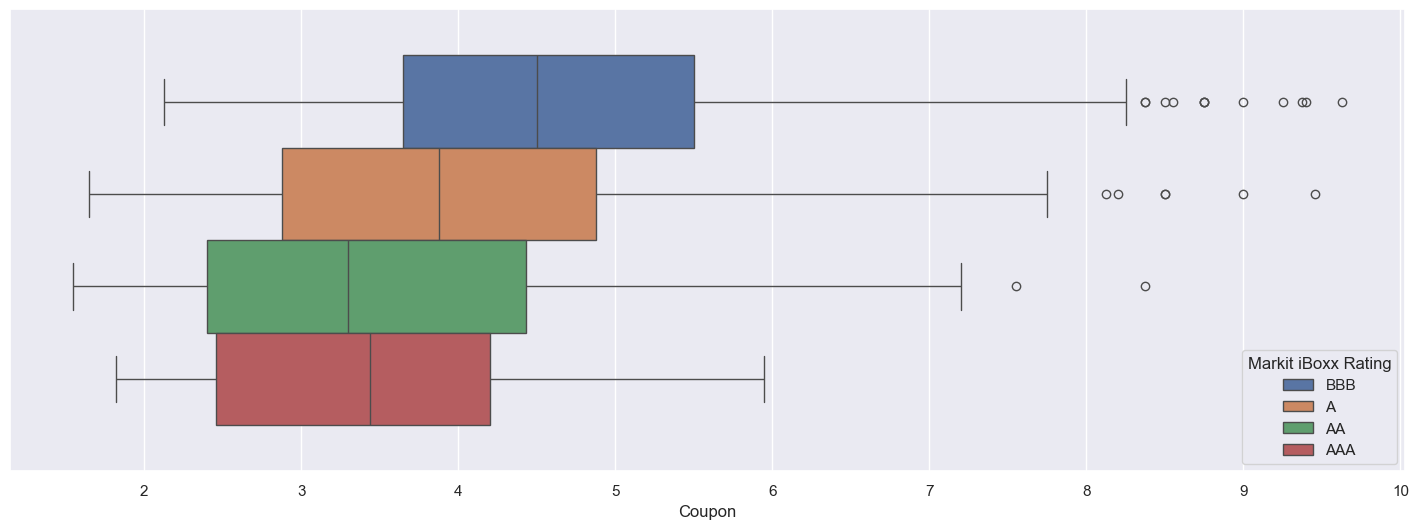

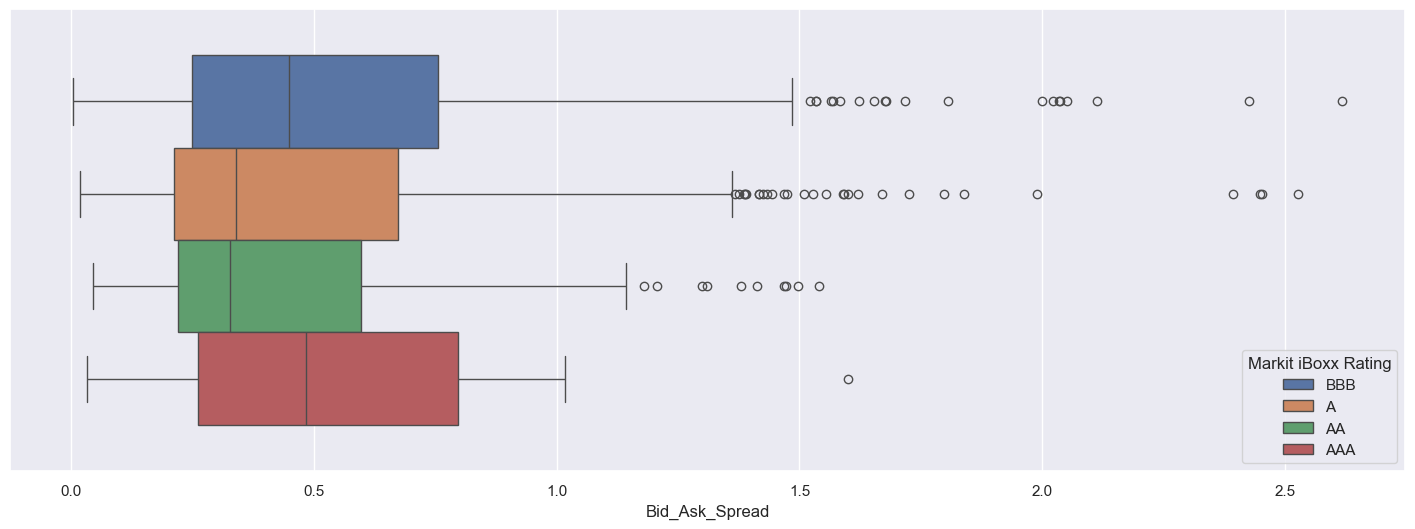

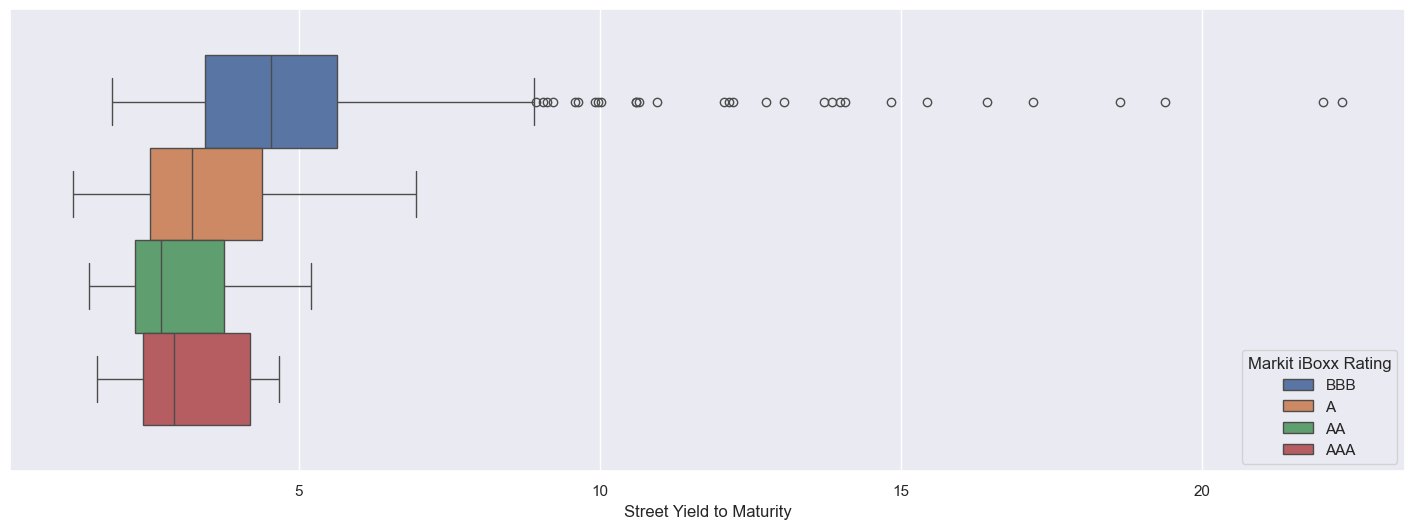

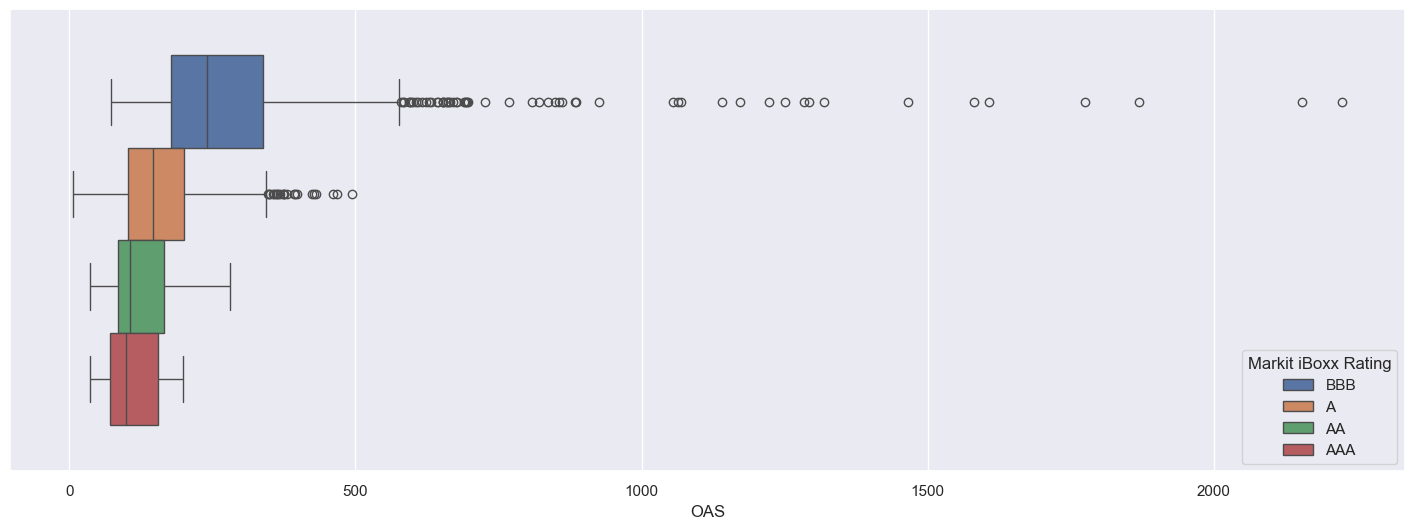

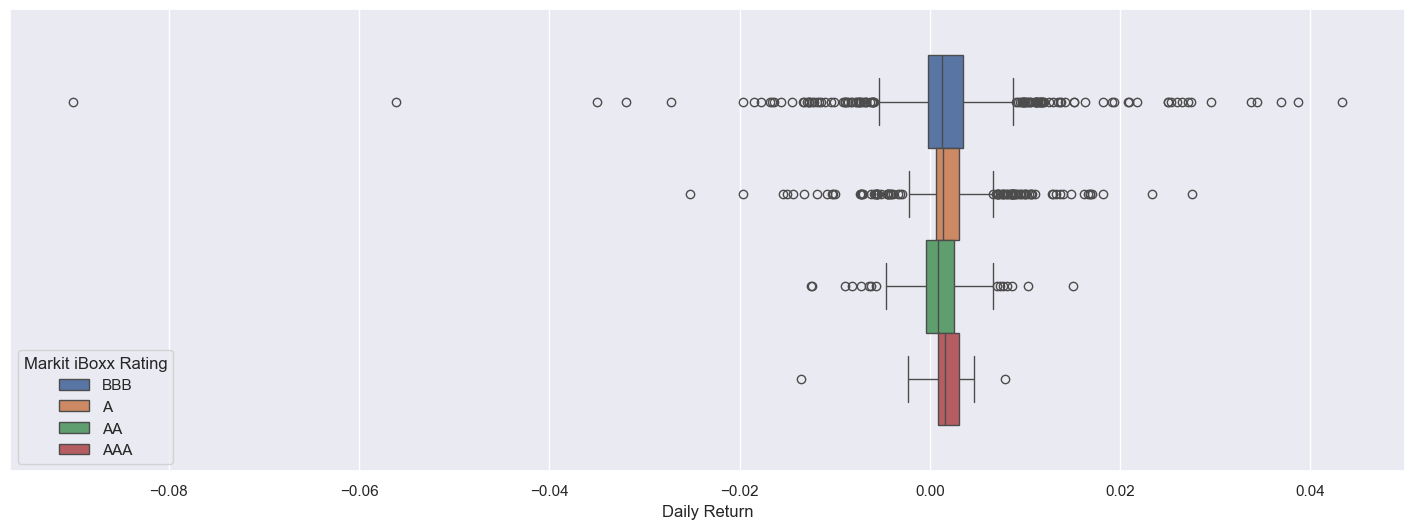

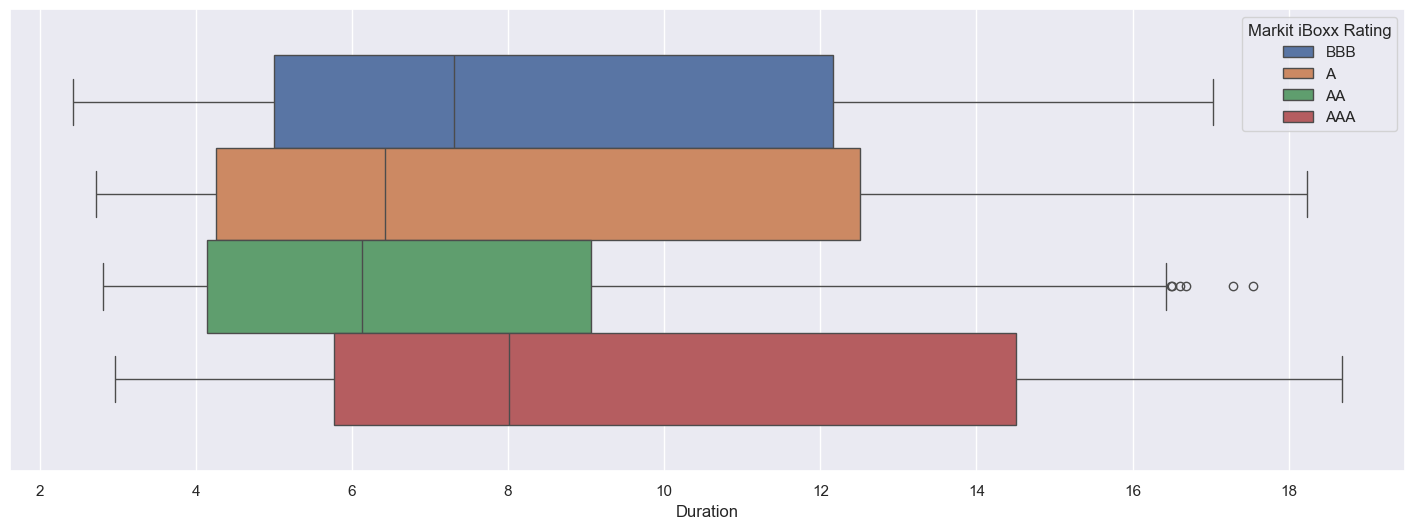

In [1407]:
plot_numerical_by_caotry(data, target_columns, 'Markit iBoxx Rating', type="box")

## Network analysis

In [1408]:
data_network = data[['Issuer', 
                     'ISIN',
                     'Level 4', 
                     'Coupon',
                     'Coupon Frequency',
                     'Expected Remaining Life',
                     'Bid_Ask_Spread',
                     'Index Price',
                     'Coupon Payment',
                     'Notional Amount',
                     'Market Value',
                     'Capped Market Value',
                     'Markit iBoxx Rating', 
                     'Street Yield to Maturity', 
                     'Duration', 
                     'OAS', 
                     'DV 01', 
                     'Daily Return', 
                     'Month-to-Date Return', 
                     'Year-to-Date Return',
                     'Markit iBoxx Rating']].copy()

In [1409]:
data_coorelation

,Coupon,Coupon Frequency,Bid_Ask_Spread,Index Price,Coupon Payment,Market Value,Capped Market Value,Street Yield to Maturity,Duration,OAS,DV 01,Daily Return
0,7.500,2,2.03688,91.89515,0.00,8.428064e+08,8.428064e+08,8.452591,8.903966,644.087419,0.082051,0.010173
1,7.750,2,0.74206,128.88048,0.00,1.568318e+09,1.301470e+09,4.975107,9.713262,281.815821,0.124727,-0.012732
2,8.750,2,1.32859,139.80405,0.00,1.178105e+09,1.178105e+09,4.970240,9.444536,281.664321,0.133503,0.002286
3,9.000,2,1.30674,139.32155,0.00,3.573039e+09,3.573039e+09,5.206532,9.325163,306.550729,0.131425,0.002277
4,7.875,2,1.11111,94.21650,0.00,1.209152e+09,1.209152e+09,8.549252,8.835563,653.532182,0.084002,0.002410
...,...,...,...,...,...,...,...,...,...,...,...,...
1477,2.650,2,0.18251,101.14301,0.00,1.017466e+09,1.017466e+09,2.465379,6.070723,71.267333,0.062870,0.001326
1478,5.700,2,0.71564,112.47667,0.00,8.484438e+08,8.484438e+08,4.751048,12.899710,233.255338,0.142957,0.002382
1479,6.000,2,1.71739,83.87674,3.00,8.404341e+08,8.404341e+08,7.542324,11.347018,527.858641,0.092961,-0.027238
1480,5.875,2,1.05953,123.52067,0.00,9.398686e+08,9.398686e+08,3.338913,8.560715,129.787117,0.106613,0.002935


In [1410]:
data_coorelation = data[focus_perporty]
data_coorelation.drop(['Level 4', 'Level 6', 'Markit iBoxx Rating'], axis=1, inplace=True)

In [1411]:
data_coorelation = data_coorelation.dropna()

correlation = data_coorelation.corr()

In [1412]:
threshold = 0.4

G = nx.Graph()

for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):  # Avoid self-loops and duplicate edges
        if abs(correlation.iloc[i, j]) >= threshold:
            
            G.add_edge(correlation.columns[i], correlation.columns[j], weight=abs(correlation.iloc[i, j]))

In [1413]:
# do the pagerank, eigenvector centrality, degree centrality, closeness centrality, betweenness centrality
def centrality_analysis(G):
    pagerank = nx.pagerank(G)
    eigenvector = nx.eigenvector_centrality(G)
    degree = nx.degree_centrality(G)
    closeness = nx.closeness_centrality(G)
    betweenness = nx.betweenness_centrality(G)
    
    return pagerank, eigenvector, degree, closeness, betweenness

result_G = centrality_analysis(G)
result_G_df = pd.DataFrame(result_G)
result_G_df.index = ['PageRank', 'Eigenvector Centrality', 'Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality']

# find the close path from index price to bid ask spread
shortest_path = nx.shortest_path(G, source='Index Price', target='Bid_Ask_Spread')
result_G_df

,Coupon,Bid_Ask_Spread,Street Yield to Maturity,Duration,DV 01,Index Price,OAS,Market Value,Capped Market Value
PageRank,0.104558,0.103243,0.141369,0.134171,0.118238,0.076439,0.099760,1.111111e-01,1.111111e-01
Eigenvector Centrality,0.490310,0.404889,0.377723,0.490310,0.404889,0.155961,0.155961,9.794274e-10,9.794274e-10
Degree Centrality,0.500000,0.375000,0.500000,0.500000,0.375000,0.250000,0.250000,1.250000e-01,1.250000e-01
Closeness Centrality,0.562500,0.409091,0.562500,0.562500,0.409091,0.375000,0.375000,1.250000e-01,1.250000e-01
Betweenness Centrality,0.107143,0.000000,0.285714,0.107143,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00


In [1414]:
plot_network(G_financial, level_unique, showLabels=True, labels_to_show=labels_to_show)

:Overlay
   .Graph.I  :Graph   [start,end]   (weights)
   .Labels.I :Labels   [x,y]   (text)

In [1415]:
def plot_network(G, level_unique: [], showLabels=False, labels_to_show=[]):
    layout = nx.kamada_kawai_layout(G)

    node_colors = ['blue' for node in G.nodes()]
    edge_colors = 'cyan'  # Tech-feel edge color
    edge_opacity = 0.2  # Tech-feel edge opacity
    
    if not showLabels:
        labels_to_show = []
        labels = {n: '' for n in G.nodes()}
    else:
        labels_to_show = labels_to_show
        labels = {n: n if n in labels_to_show else '' for n in G.nodes()}
    
    opts = {
        'width': 1000,
        'height': 1000,
        'node_size': 10,
        'edge_width': 3,
    }

    specific_node_color = {
        'AAA': '#FF6347',  # Tomato
        'AA': '#4682B4',   # Steel Blue
        'A': '#32CD32',    # Lime Green
        'BBB': '#FFD700',  # Gold
    }
    
    default_color = 'white' 
    node_size= []
    node_colors = []
    
    for node in G.nodes():
        if node in level_unique:
            node_size.append(10)
            node_colors.append('white')
        elif node in specific_node_color:
            node_size.append(10)
            node_colors.append('white')
        else:
            node_size.append(20)
            node_colors.append(default_color)
    
    background_color = 'black'
    edge_width = 0.5
    font_color = '#FE019A'

    opts['node_color'] = node_colors
    opts['edge_color'] = edge_colors
    opts['node_size'] = node_size
    opts['edge_width'] = edge_width

    opts['font_color'] = font_color
    opts['edge_opacity'] = edge_opacity
    opts['labels'] = labels
    
    # font position
    opts['label_pos'] = 'down'

    
    network_plot = hvnx.draw(G, layout, **opts).opts(bgcolor=background_color)
    return network_plot

In [1416]:
plot_network(G, [], showLabels=True, labels_to_show=['OAS', 'DV 01', 'Duration', 'Street Yield to Maturity', 'Market Value', 'Capped Market Value', 'Coupon Payment', 'Coupon', 'Bid_Ask_Spread', 'Index Price', 'Daily Return'])

:Overlay
   .Graph.I  :Graph   [start,end]   (weight)
   .Labels.I :Labels   [x,y]   (text)

In [1417]:
data_for_network = data[['Issuer', 'ISIN', 'Level 4', 'Level 5', 'Level 6', 'Level 7', 'Level 8', 'Markit iBoxx Rating']].copy()

catory = data_for_network['Level 4'].unique()
issuers = data_for_network['Issuer'].unique()

finalcial_data= data_for_network[data_for_network['Level 4'] == 'Financials'].copy()
non_financial_data = data_for_network[data_for_network['Level 4'] == 'Non-Financials'].copy()


In [1418]:
rating_unique = data_for_network['Markit iBoxx Rating'].unique()
level_5_unique = finalcial_data['Level 6'].unique().tolist()
level_6_unique = non_financial_data['Level 5'].unique().tolist()

In [1419]:
level_unique = level_5_unique + level_6_unique

In [1420]:
def find_unique_columns(data, target_column):
    hashtable_catorical = {}
    list_catorical = data[target_column].unique()
    for catorical in list_catorical:
        hashtable_catorical[catorical] = data[target_column].value_counts()[catorical]
    return hashtable_catorical

def inner_join_data(data, finalcial_data, non_financial_data, rating, catory, inner_target='ISIN'):
    rating = data[data[catory] == rating].copy()
    rating_finance = pd.concat([rating, finalcial_data], axis=1, join='inner')
    rating_finance = rating_finance.loc[:,~rating_finance.columns.duplicated()]
    rating_non_finance = pd.concat([rating, non_financial_data], axis=1, join='inner')
    rating_non_finance = rating_non_finance.loc[:,~rating_non_finance.columns.duplicated()]
    return rating_finance, rating_non_finance

In [1421]:
rating_AAA_finance, rating_AAA_non_finance = inner_join_data(data_for_network, finalcial_data, non_financial_data, 'AAA', 'Markit iBoxx Rating')
rating_AA_finance, rating_AA_non_finance = inner_join_data(data_for_network, finalcial_data, non_financial_data, 'AA', 'Markit iBoxx Rating')
rating_A_finance, rating_A_non_finance = inner_join_data(data_for_network, finalcial_data, non_financial_data, 'A', 'Markit iBoxx Rating')
rating_BBB_finance, rating_BBB_non_finance = inner_join_data(data_for_network, finalcial_data, non_financial_data, 'BBB', 'Markit iBoxx Rating')

In [1422]:
def add_subgraph(G, rating_data, rating, data_type='Financials'):
    if rating_data.empty:
        return G
    
    G.add_node(rating)
        
    for i in range(len(rating_data)):
        issuer = rating_data.iloc[i]['Issuer']
        if data_type == 'Financials':
            aimed_catory = rating_data.iloc[i]['Level 6']
        else:
            aimed_catory = rating_data.iloc[i]['Level 5']
        G.add_edge(issuer, aimed_catory, weights=1)
        G.add_edge(issuer, rating, weights=1)
    return G

def build_network_rating(rating_AAA, rating_AA, rating_A, rating_BBB):
    G = nx.Graph()
    G = add_subgraph(G, rating_AAA, 'AAA')
    G = add_subgraph(G, rating_AA, 'AA')
    G = add_subgraph(G, rating_A, 'A')
    G = add_subgraph(G, rating_BBB, 'BBB')

    return G

In [1423]:
G_non_financial = build_network_rating(rating_AAA_non_finance, rating_AA_non_finance, rating_A_non_finance, rating_BBB_non_finance)
G_financial = build_network_rating(rating_AAA_finance, rating_AA_finance, rating_A_finance, rating_BBB_finance)

In [1424]:
labels_to_show = level_unique + ['AAA', 'AA', 'A', 'BBB']

In [1425]:
plot_network(G_non_financial, level_unique, showLabels=True, labels_to_show=labels_to_show)

:Overlay
   .Graph.I  :Graph   [start,end]   (weights)
   .Labels.I :Labels   [x,y]   (text)

In [1426]:
plot_network(G_financial, level_unique, showLabels=True, labels_to_show=labels_to_show)

:Overlay
   .Graph.I  :Graph   [start,end]   (weights)
   .Labels.I :Labels   [x,y]   (text)

In [1427]:
# find the central node
def find_the_order_of_center_node(G, level_unique):
    center_node = nx.center(G)
    return center_node

center_node_non_financial = find_the_order_of_center_node(G_non_financial, level_unique)
center_node_financial = find_the_order_of_center_node(G_financial, level_unique)

# calculate the degree of the node
def find_the_degree_of_node(G, level_unique):
    degree = nx.degree(G)
    return degree

degree_non_financial = find_the_degree_of_node(G_non_financial, level_unique)
degree_financial = find_the_degree_of_node(G_financial, level_unique)

# find the degree of the node
def find_the_clustering_coefficient(G, level_unique):
    clustering_coefficient = nx.clustering(G)
    return clustering_coefficient

clustering_coefficient_non_financial = find_the_clustering_coefficient(G_non_financial, level_unique)
clustering_coefficient_financial = find_the_clustering_coefficient(G_financial, level_unique)

# find the degree of the node
def find_the_betweenness_centrality(G, level_unique):
    betweenness_centrality = nx.betweenness_centrality(G)
    return betweenness_centrality

betweenness_centrality_non_financial = find_the_betweenness_centrality(G_non_financial, level_unique)
betweenness_centrality_financial = find_the_betweenness_centrality(G_financial, level_unique)

# find the degree of the node

def find_the_eigenvector_centrality(G, level_unique):
    eigenvector_centrality = nx.eigenvector_centrality(G)
    return eigenvector_centrality

eigenvector_centrality_non_financial = find_the_eigenvector_centrality(G_non_financial,level_unique)
eigenvector_centrality_financial = find_the_eigenvector_centrality(G_financial, level_unique)

# find the degree of the node
def find_the_pagerank(G, level_unique):
    pagerank = nx.pagerank(G)
    return pagerank

pagerank_non_financial = find_the_pagerank(G_non_financial, level_unique)
pagerank_financial = find_the_pagerank(G_financial, level_unique)

In [1428]:
# put the pagerank, betweenness_centrality_non_financial,eigenvector_centrality and into the table to show the result
df_financial = pd.DataFrame([pagerank_financial, betweenness_centrality_financial, eigenvector_centrality_financial]).T
df_financial.columns = ['pagerank', 'betweenness_centrality', 'eigenvector_centrality']
# remove the bond rating, and in the level 4 in the index
# order with the pagerank
df_financial = df_financial.sort_values(by='pagerank', ascending=False)
df_financial_without_rating = df_financial[7:]
df_financial_without_rating = df_financial_without_rating.sort_values(by='eigenvector_centrality', ascending=False)
df_financial_without_rating.head(20)

,pagerank,betweenness_centrality,eigenvector_centrality
Morgan Stanley,0.005184,0.008025,0.093560
Goldman Sachs Group Inc,0.005184,0.008025,0.093560
Citigroup Inc,0.005184,0.008025,0.093560
Bank of America Corp,0.005184,0.008025,0.093560
BNP Paribas,0.005184,0.008025,0.093560
GOLDMAN SACHS GROUP INC,0.005184,0.008025,0.093560
Barclays Bank PLC,0.005184,0.008025,0.093560
Bank of America Corporation,0.005184,0.008025,0.093560
Fifth Third Bancorp,0.005184,0.008025,0.093560
The Goldman Sachs Group Inc,0.005184,0.008025,0.093560


In [1429]:
df_non_financial = pd.DataFrame([pagerank_non_financial, betweenness_centrality_non_financial, eigenvector_centrality_non_financial]).T
df_non_financial.columns = ['pagerank', 'betweenness_centrality', 'eigenvector_centrality']
# remove the bond rating, and in the level 4 in the index
df_non_financial = df_non_financial.sort_values(by='eigenvector_centrality', ascending=False)
df_non_financial.head(20)

,pagerank,betweenness_centrality,eigenvector_centrality
BBB,0.130445,0.598018,0.644327
Oil & Gas,0.051698,0.168092,0.225992
Health Care,0.031522,0.104448,0.083280
A,0.074731,0.270469,0.077429
Industrial Goods & Services,0.025391,0.070411,0.066563
Media,0.017157,0.023589,0.065002
Telecommunications,0.014173,0.001537,0.064986
Canadian Natural Resources Limited,0.001768,0.001521,0.062093
Enterprise Products Operating LLC,0.001768,0.001521,0.062093
Williams Partners LP,0.001768,0.001521,0.062093


In [1430]:
# Check the most connect node with node 'BBB'
def find_the_most_connect_node(G, level_unique, node):
    most_connect_node = nx.ego_graph(G, node)
    return most_connect_node

most_connect_node_non_financial = find_the_most_connect_node(G_non_financial, level_unique, 'AAA')
most_connect_node_financial = find_the_most_connect_node(G_financial, level_unique, 'BBB')

In [1431]:
# find the node has two degree
def find_the_node_has_two_degree(G, level_unique):
    degree_two = [node for node, degree in nx.degree(G) if degree > 2]
    return degree_two

degree_two_non_financial = find_the_node_has_two_degree(G_non_financial, level_unique)
degree_two_financial = find_the_node_has_two_degree(G_financial, level_unique)

In [1432]:
# mark the node has two degree with yellow 

def plot_network_with_degree_two(G, level_unique, degree_two):
    layout = nx.kamada_kawai_layout(G)

    node_colors = ['white' for node in G.nodes()]
    edge_colors = 'cyan'  # Tech-feel edge color
    edge_opacity = 0.2  # Tech-feel edge opacity

    opts = {
        'width': 800,
        'height': 600,
        'node_size': 10,
        'edge_width': 3,
        'with_labels': False,
    }

    specific_node_color = {
        'AAA': '#FF6347',  # Tomato
        'AA': '#4682B4',   # Steel Blue
        'A': '#32CD32',    # Lime Green
        'BBB': 'grey',  # Gold
    }

    default_color = 'white' 
    node_size= []
    node_colors = []
    
    for node in G.nodes():
        if node in level_unique:
            node_size.append(40)
            node_colors.append('blue')
        elif node in specific_node_color:
            node_size.append(60)
            node_colors.append(specific_node_color[node])
        elif node in degree_two:
            node_size.append(60)
            node_colors.append('yellow')
        else:
            node_size.append(20)
            node_colors.append(default_color)
    
    background_color = 'black'
    edge_width = 0.5
    font_color = 'white'

    opts['node_color'] = node_colors
    opts['edge_color'] = edge_colors
    opts['node_size'] = node_size
    opts['edge_width'] = edge_width

    opts['font_color'] = font_color
    opts['edge_opacity'] = edge_opacity

    network_plot = hvnx.draw(G, layout, **opts).opts(bgcolor=background_color)
    return network_plot

plot_network_with_degree_two(G_financial, level_unique, degree_two_financial)

:Graph   [start,end]   (weights)

In [1433]:
plot_network(G_financial, level_unique, showLabels=True, labels_to_show=labels_to_show)

:Overlay
   .Graph.I  :Graph   [start,end]   (weights)
   .Labels.I :Labels   [x,y]   (text)

In [1434]:
new_focus_perporty = [
 'Issuer',
 'ISIN',
 'Coupon',
 'Coupon Frequency',
 'Bid_Ask_Spread',
 'Index Price',
 'Coupon Payment',
 'Market Value',
 'Capped Market Value',
 'Street Yield to Maturity',
 'Duration',
 'OAS',
 'DV 01',
 'Level 4',
 'Level 6',
 'Markit iBoxx Rating',
 'Daily Return']

In [1435]:
data = pd.read_excel('iboxx_usd_lq_ig_eod_underlyings_20160125.xlsx')
new_data = data[new_focus_perporty]
new_data_AAA = new_data[new_data['Markit iBoxx Rating'] == 'AAA']
new_data_AA = new_data[new_data['Markit iBoxx Rating'] == 'AA']
new_data_A = new_data[new_data['Markit iBoxx Rating'] == 'A']
new_data_BBB = new_data[new_data['Markit iBoxx Rating'] == 'BBB']

## OverValue Bond

In [1436]:
def identify_overvalue_bond(data, target_column1, quantile1, target_column2, quantile2, new_data):
    target_column_quantile1 = data[target_column1].quantile(quantile1)
    target_column_quantile2 = new_data[target_column2].quantile(quantile2)
    target_column_quantile_df = data[data[target_column1] < target_column_quantile1]
    target_column_quantile_df = target_column_quantile_df[target_column_quantile_df[target_column2] > target_column_quantile2]
    return target_column_quantile_df

overvalue_bond_AAA = identify_overvalue_bond(new_data_AAA, 'OAS', 0.25, 'Street Yield to Maturity', 0.5, new_data)
overvalue_bond_AA = identify_overvalue_bond(new_data_AA, 'OAS', 0.25, 'Street Yield to Maturity', 0.5, new_data)
overvalue_bond_A = identify_overvalue_bond(new_data_A, 'OAS', 0.25, 'Street Yield to Maturity', 0.5, new_data)
overvalue_bond_BBB = identify_overvalue_bond(new_data_BBB, 'OAS', 0.25, 'Street Yield to Maturity', 0.5, new_data)

overvalue_bonds = pd.concat([overvalue_bond_AAA, overvalue_bond_AA, overvalue_bond_A, overvalue_bond_BBB])
overvalue_bonds

,Issuer,ISIN,Coupon,Coupon Frequency,Bid_Ask_Spread,Index Price,Coupon Payment,Market Value,Capped Market Value,Street Yield to Maturity,Duration,OAS,DV 01,Level 4,Level 6,Markit iBoxx Rating,Daily Return
829,Toyota Motor Credit Corp,XS1283509427,4.25,1,0.32000,97.23600,0.000000,7.412231e+08,7.412231e+08,4.417773,16.936203,81.569153,0.093808,Non-Financials,Automobiles & Parts,A,0.000358
343,Kraft Heinz Foods Co,US423074AX14,3.95,2,0.14949,101.73387,2.117639,2.036872e+09,2.036872e+09,3.730901,7.823644,176.200020,0.080826,Non-Financials,Food & Beverage,BBB,0.003280
934,McDonald's Corp,US58013MEY66,3.70,2,0.39295,99.73982,0.000000,1.753720e+09,1.753720e+09,3.730244,8.419512,172.182161,0.083764,Non-Financials,Travel & Leisure,BBB,0.001974
1237,Waste Management Inc,US94106LBC28,4.10,2,0.47539,95.17410,0.000000,7.261058e+08,7.261058e+08,4.395280,16.652031,171.263385,0.155764,Non-Financials,Industrial Goods & Services,BBB,0.008452
1262,ProLogis LP,US74340XBE04,3.75,2,0.41259,100.18908,0.000000,7.580587e+08,7.580587e+08,3.726184,8.022393,173.441384,0.082261,Financials,Real Estate,BBB,0.001819


## UnderValue Bond

In [1437]:
def identify_undervalue_bond(data, target_column1, quantile1, target_column2, quantile2, new_data):
    target_column_quantile1 = data[target_column1].quantile(quantile1)
    target_column_quantile2 = new_data[target_column2].quantile(quantile2)
    target_column_quantile_df = data[data[target_column1] > target_column_quantile1]
    target_column_quantile_df = target_column_quantile_df[target_column_quantile_df[target_column2] < target_column_quantile2]
    return target_column_quantile_df

undervalue_bond_AAA = identify_undervalue_bond(new_data_AAA, 'OAS', 0.75, 'Street Yield to Maturity', 0.5, new_data)
undervalue_bond_AA = identify_undervalue_bond(new_data_AA, 'OAS', 0.75, 'Street Yield to Maturity', 0.5, new_data)
undervalu_bond_A = identify_undervalue_bond(new_data_A, 'OAS', 0.75, 'Street Yield to Maturity', 0.5, new_data)
undervalue_bond_BBB = identify_undervalue_bond(new_data_BBB, 'OAS', 0.75, 'Street Yield to Maturity', 0.5, new_data)

undervalue_bonds = pd.concat([undervalue_bond_AAA, undervalue_bond_AA, undervalu_bond_A, undervalue_bond_BBB])
undervalue_bonds

,Issuer,ISIN,Coupon,Coupon Frequency,Bid_Ask_Spread,Index Price,Coupon Payment,Market Value,Capped Market Value,Street Yield to Maturity,Duration,OAS,DV 01,Level 4,Level 6,Markit iBoxx Rating,Daily Return
161,Total Capital Canada Ltd,US89153UAF84,2.750,2,0.75275,95.10071,1.3750,9.517710e+08,9.517710e+08,3.500751,6.778951,170.604733,0.064391,Non-Financials,Oil & Gas,AA,-0.003593
188,Statoil ASA,US85771PAK84,2.650,2,0.66453,93.63630,1.3250,8.433892e+08,8.433892e+08,3.574333,7.202552,173.038486,0.067378,Non-Financials,Oil & Gas,AA,-0.003114
577,Statoil ASA,US85771PAG72,2.450,2,0.17901,94.11217,1.2250,1.035833e+09,1.035833e+09,3.405064,6.432610,165.821730,0.060507,Non-Financials,Oil & Gas,AA,0.002566
598,Total Capital International SA,US89153VAG41,3.700,2,0.45054,100.58237,1.8500,1.006851e+09,1.006851e+09,3.615139,6.973114,178.690790,0.070048,Non-Financials,Oil & Gas,AA,-0.001439
634,Schlumberger Investment SA,US806854AH81,3.650,2,0.68041,100.20871,0.0000,1.511343e+09,1.511343e+09,3.618714,6.670187,177.489869,0.068613,Non-Financials,Oil & Gas,AA,0.001658
1064,Shell International Finance BV,US822582AV48,2.250,2,0.36699,92.12950,1.1250,9.224825e+08,9.224825e+08,3.537597,6.437191,179.401294,0.059326,Non-Financials,Oil & Gas,AA,-0.000341
1181,Shell International Finance BV,US822582AX04,3.400,2,0.32536,98.59264,0.0000,1.001321e+09,1.001321e+09,3.614534,6.609874,182.265816,0.066048,Non-Financials,Oil & Gas,AA,-0.006370
1305,Statoil ASA,US85771PAF99,3.150,2,0.55362,98.92491,1.5750,7.420681e+08,7.420681e+08,3.349421,5.505043,173.327815,0.054421,Non-Financials,Oil & Gas,AA,-0.012349
1395,TOTAL CAPITAL INTERNATIONAL,US89153VAL36,3.750,2,0.72011,100.85249,0.0000,1.274328e+09,1.274328e+09,3.628397,7.071014,178.000835,0.071902,Non-Financials,Oil & Gas,AA,-0.002217
53,BHP Billiton Finance USA Ltd,US055451AH17,6.500,2,0.38054,109.30035,0.0000,1.948777e+09,1.948777e+09,3.391099,2.887098,229.996292,0.032120,Non-Financials,Basic Resources,A,-0.001052


In [1438]:
undervalue_bonds.to_csv('undervalue_bonds_model_G.csv')

In [1439]:
data1 = [overvalue_bonds["Duration"].values]
data2 = [undervalue_bonds["Duration"].values]

data3 = [overvalue_bonds["DV 01"].values]
data4 = [undervalue_bonds["DV 01"].values]

data5 = [np.log(overvalue_bonds["Market Value"].values)]
data6 = [np.log(undervalue_bonds["Market Value"].values)]

data7 = [overvalue_bonds["Index Price"].values]
data8 = [undervalue_bonds["Index Price"].values]

colours1 = ['#FFA07A']
colours2 = ['#20B2AA']

group_labels1 = ['Overvalue Bond (Model-G)']
group_labels2 = ['Undervalue Bond (Model-G)']

fig1 = ff.create_distplot(data1, group_labels1, show_rug=False, show_hist=False, colors=colours1)
fig2 = ff.create_distplot(data2, group_labels2, show_rug=False, show_hist=False, colors=colours2)

fig3 = ff.create_distplot(data3, group_labels1, show_rug=False, show_hist=False, colors=colours1)
fig4 = ff.create_distplot(data4, group_labels2, show_rug=False, show_hist=False, colors=colours2)

# fig5 = ff.create_distplot(data5, group_labels1, show_rug=False, show_hist=False, colors=colours1)
# fig6 = ff.create_distplot(data6, group_labels2, show_rug=False, show_hist=False, colors=colours2)

# fig7 = ff.create_distplot(data7, group_labels1, show_rug=False, show_hist=False, colors=colours1)
# fig8 = ff.create_distplot(data8, group_labels2, show_rug=False, show_hist=False, colors=colours2)

fig = make_subplots(rows=2, cols=2)

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=2, col=1)

fig3.data[0].showlegend = False
fig4.data[0].showlegend = False
fig.add_trace(fig3.data[0], row=1, col=2)
fig.add_trace(fig4.data[0], row=2, col=2)

# fig5.data[0].showlegend = False
# fig6.data[0].showlegend = False
# fig.add_trace(fig5.data[0], row=1, col=3)
# fig.add_trace(fig6.data[0], row=2, col=3)

# fig7.data[0].showlegend = False
# fig8.data[0].showlegend = False
# fig.add_trace(fig7.data[0], row=1, col=4)
# fig.add_trace(fig8.data[0], row=2, col=4)

# Update xaxis properties
fig.update_xaxes(title_text="Duration", row=1, col=1)
fig.update_xaxes(title_text="Duration", row=2, col=1)

fig.update_xaxes(title_text="DV 01", row=1, col=2)
fig.update_xaxes(title_text="DV 01", row=2, col=2)

# fig.update_xaxes(title_text="Market Value (Log value)", row=1, col=3)
# fig.update_xaxes(title_text="Market Value (Log value)", row=2, col=3)

# fig.update_xaxes(title_text="Index Price", row=1, col=4)
# fig.update_xaxes(title_text="Index Price", row=2, col=4)

# Update yaxis properties
fig.update_yaxes(title_text="Density", row=1, col=1)
fig.update_yaxes(title_text="Density", row=2, col=1)

fig.update_layout(height=700, width=1200)
fig.show()

In [1440]:
# Calculate quantiles
quantiles = np.quantile(new_data_bid_ask_spread, [0.25, 0.5, 0.75])

fig = go.Figure()
fig.add_trace(go.Histogram(x=new_data_bid_ask_spread, name='Bid_Ask_Spread', opacity=0.5, marker_color='blue'))

# Add quantile lines as scatter trace for legend support
colors = ['green', 'red', 'purple']  # Colors for the 25th, 50th, and 75th quantiles
quantile_names = ['25th Quantile', '50th Quantile (Median)', '75th Quantile']
for quantile, color, name in zip(quantiles, colors, quantile_names):
    fig.add_trace(go.Scatter(x=[quantile, quantile], y=[0, 148],
                             mode='lines', line=dict(color=color, width=2),
                             name=name, xaxis="x", yaxis="y"))

fig.show()

In [1441]:
# check the distribution of the bid ask spread
def plot_distribution(data, column, title):
    fig = px.histogram(data, x=column, title=title)
    return fig

plot_distribution(new_data_oas_quantile_75_df, 'OAS', 'Distribution of OAS with Quantile 75')

In [1442]:
plot_distribution(new_data_oas_quantile_75_df, 'Bid_Ask_Spread', 'Distribution of OAS with Quantile 75')

In [1443]:
new_focus_perporty_cluster = ['Issuer','ISIN','Coupon', 'Coupon Frequency',
 'Bid_Ask_Spread',
 'Level 4',
 'Level 6',
 'Index Price',
 'Coupon Payment',
 'Market Value',
 'Capped Market Value',
 'Street Yield to Maturity',
 'Duration',
 'OAS',
 'DV 01',
 'Markit iBoxx Rating',
 'Daily Return']

In [1444]:
data_cluster = data[new_focus_perporty_cluster].copy()
data_cluster['Markit iBoxx Rating'] = data_cluster['Markit iBoxx Rating'].map({'AAA': 4, 'AA': 3, 'A': 2, 'BBB': 1})
data_cluster_without_issuer = data_cluster.drop('Issuer', axis=1)
data_cluster_without_issuer = data_cluster_without_issuer.drop('ISIN', axis=1)
data_cluster_without_issuer = data_cluster_without_issuer.drop('Level 4', axis=1)
data_cluster_without_issuer = data_cluster_without_issuer.drop('Level 6', axis=1)

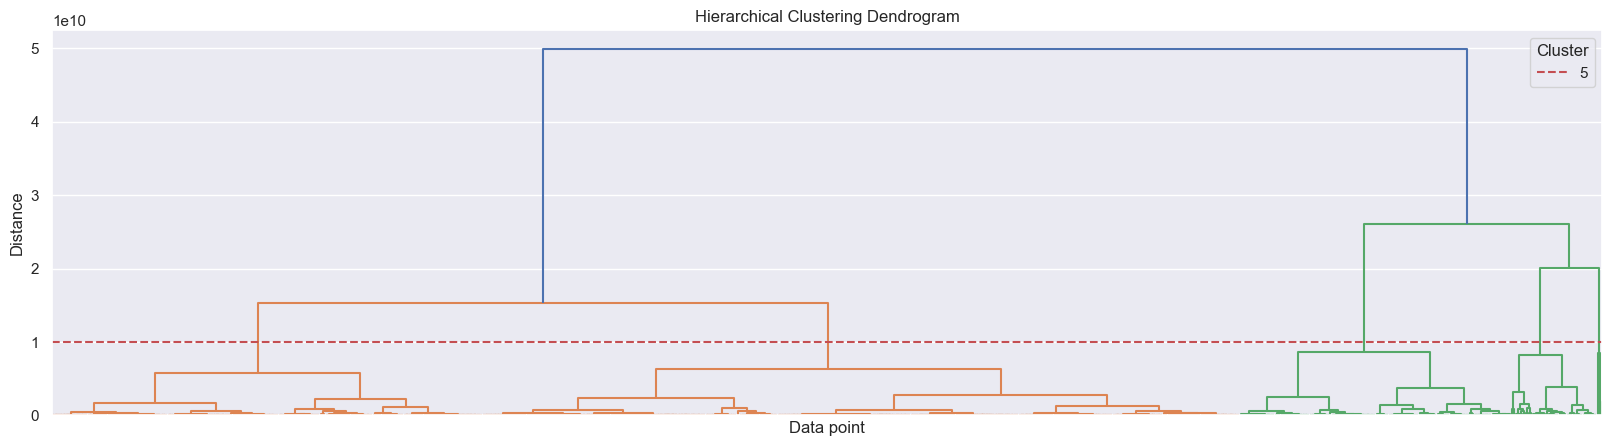

In [1445]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

distance_matrix = pdist(data_cluster_without_issuer)

# Compute the linkage matrix using the 'ward' method
linkage_matrix = linkage(distance_matrix, method='ward')
# Plot the dendrogram
plt.figure(figsize=(20, 5))
dendrogram(linkage_matrix,no_labels=True)
# draw the line for the number of cluster
plt.axhline(y=10**10, color='r', linestyle='--')

# legend should be --
custom_lines = [Line2D([0], [0], color='r', linestyle='--')] 
plt.legend(custom_lines, ['5'], title='Cluster', loc='upper right')

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')

plt.show()

In [1446]:
# clustering with Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
def hierarchical_clustering(data, n_clusters):
    clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(data)
    return clustering

clustering = hierarchical_clustering(data_cluster_without_issuer, 5)
clustering_labels = clustering.labels_
data_cluster_without_issuer['Cluster'] = clustering_labels

In [1447]:
# silhouette scores 
from sklearn.metrics import silhouette_score

silhouette_score(data_cluster_without_issuer, clustering_labels)

0.5639880305821668

In [1448]:
cluster_analysis = data_cluster_without_issuer.groupby('Cluster').mean()
cluster_analysis

,Coupon,Coupon Frequency,Bid_Ask_Spread,Index Price,Coupon Payment,Market Value,Capped Market Value,Street Yield to Maturity,Duration,OAS,DV 01,Markit iBoxx Rating,Daily Return
Cluster,,,,,,,,,,,,,
0,4.240800,2.000000,0.464215,103.869391,0.455260,2.181291e+09,2.164977e+09,3.680695,8.505979,177.443684,0.088019,1.884615,0.001980
1,5.042000,2.000000,0.366692,109.618902,0.000000,8.435853e+09,7.839544e+09,4.176131,10.088087,206.032129,0.111570,1.800000,0.001898
2,4.105184,2.001381,0.561011,97.625762,0.332433,8.753665e+08,8.737018e+08,4.426879,8.256156,255.033730,0.079555,1.653315,0.001474
3,4.831707,2.000000,0.398377,107.503190,0.487488,3.556753e+09,3.480074e+09,3.720452,8.251399,183.533569,0.088701,1.890244,0.001425
4,4.431905,2.000000,0.497348,104.527850,0.261342,1.348678e+09,1.342225e+09,3.719636,7.578902,191.269755,0.079379,1.751825,0.001807


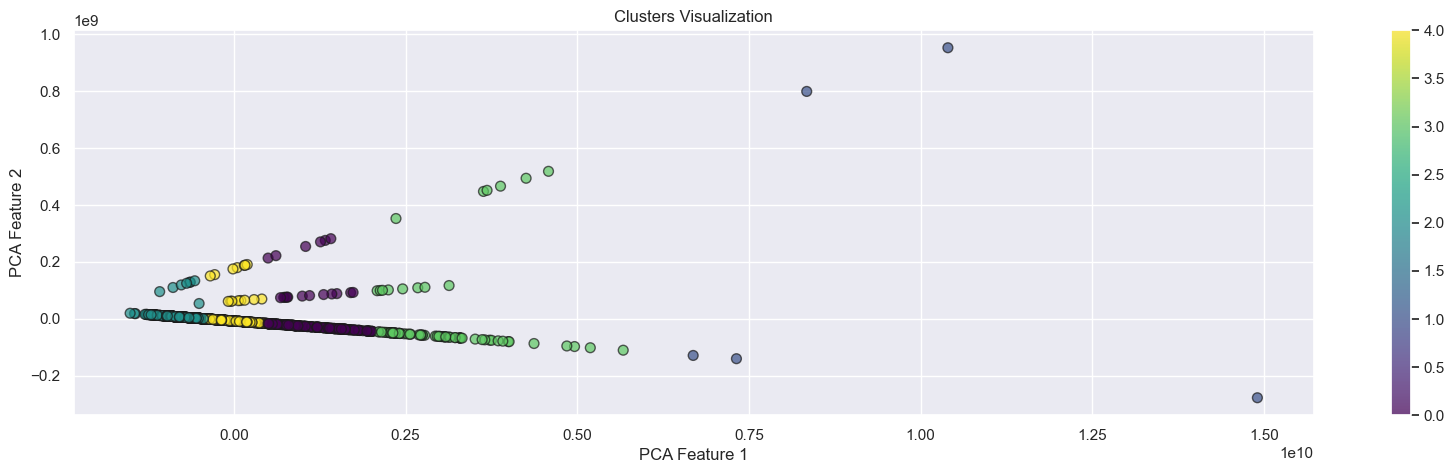

In [1449]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducing the dataset dimensions with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_cluster_without_issuer.drop('Cluster', axis=1))

# Plotting the reduced data points with cluster labels
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clustering_labels, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
# change the size
plt.gcf().set_size_inches(20, 5)
plt.title('Clusters Visualization')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar()
plt.show()

In [1450]:
data_cluster_withissuer = data_cluster_without_issuer.copy()
data_cluster_withissuer['Issuer'] = data_cluster['Issuer'].values
data_cluster_withissuer['ISIN'] = data_cluster['ISIN'].values
data_cluster_withissuer['Level 4'] = data_cluster['Level 4'].values
data_cluster_withissuer['Level 6'] = data_cluster['Level 6'].values
data_cluster_withissuer_cluster_0 = data_cluster_withissuer[data_cluster_withissuer['Cluster'] == 0]
data_cluster_withissuer_cluster_1 = data_cluster_withissuer[data_cluster_withissuer['Cluster'] == 1]
data_cluster_withissuer_cluster_2 = data_cluster_withissuer[data_cluster_withissuer['Cluster'] == 2]
data_cluster_withissuer_cluster_3 = data_cluster_withissuer[data_cluster_withissuer['Cluster'] == 3]
data_cluster_withissuer_cluster_4 = data_cluster_withissuer[data_cluster_withissuer['Cluster'] == 4]

In [1451]:
over_bond_cluster_0 = identify_overvalue_bond(data_cluster_withissuer_cluster_0, 'OAS', 0.25, 'Street Yield to Maturity', 0.5, data_cluster_withissuer)
over_bond_cluster_1 = identify_overvalue_bond(data_cluster_withissuer_cluster_1, 'OAS', 0.25, 'Street Yield to Maturity', 0.5, data_cluster_withissuer)
over_bond_cluster_2 = identify_overvalue_bond(data_cluster_withissuer_cluster_2, 'OAS', 0.25, 'Street Yield to Maturity', 0.5, data_cluster_withissuer)
over_bond_cluster_3 = identify_overvalue_bond(data_cluster_withissuer_cluster_3, 'OAS', 0.25, 'Street Yield to Maturity', 0.5, data_cluster_withissuer)
over_bond_cluster_4 = identify_overvalue_bond(data_cluster_withissuer_cluster_4, 'OAS', 0.25, 'Street Yield to Maturity', 0.5, data_cluster_withissuer)
over_bond_cluster = pd.concat([over_bond_cluster_0, over_bond_cluster_1, over_bond_cluster_2, over_bond_cluster_3, over_bond_cluster_4])
over_bond_cluster["Markit iBoxx Rating"] = over_bond_cluster["Markit iBoxx Rating"].map({4: 'AAA', 3: 'AA', 2: 'A', 1: 'BBB'})
over_bond_cluster

,Coupon,Coupon Frequency,Bid_Ask_Spread,Index Price,Coupon Payment,Market Value,Capped Market Value,Street Yield to Maturity,Duration,OAS,DV 01,Markit iBoxx Rating,Daily Return,Cluster,Issuer,ISIN,Level 4,Level 6
745,3.70,2,0.97100,96.30622,0.0,7.822898e+08,7.822898e+08,3.913593,17.560333,119.108894,0.166315,A,-0.000241,2,Eli Lilly & Co,US532457BJ65,Non-Financials,Health Care
829,4.25,1,0.32000,97.23600,0.0,7.412231e+08,7.412231e+08,4.417773,16.936203,81.569153,0.093808,A,0.000358,2,Toyota Motor Credit Corp,XS1283509427,Non-Financials,Automobiles & Parts
405,4.30,2,0.20959,102.93456,0.0,3.619850e+09,3.619850e+09,4.127973,17.057640,142.181212,0.171684,A,0.003822,3,Visa Inc,US92826CAF95,Financials,Financial Services


In [1452]:
over_bond_cluster.to_csv('over_bond_cluster.csv', index=False)

In [1453]:
under_bond_cluster_0 = identify_undervalue_bond(data_cluster_withissuer_cluster_0, 'OAS', 0.75, 'Street Yield to Maturity', 0.5, data_cluster_withissuer)
under_bond_cluster_1 = identify_undervalue_bond(data_cluster_withissuer_cluster_1, 'OAS', 0.75, 'Street Yield to Maturity', 0.5, data_cluster_withissuer)
under_bond_cluster_2 = identify_undervalue_bond(data_cluster_withissuer_cluster_2, 'OAS', 0.75, 'Street Yield to Maturity', 0.5, data_cluster_withissuer)
under_bond_cluster_3 = identify_undervalue_bond(data_cluster_withissuer_cluster_3, 'OAS', 0.75, 'Street Yield to Maturity', 0.5, data_cluster_withissuer)
under_bond_cluster_4 = identify_undervalue_bond(data_cluster_withissuer_cluster_4, 'OAS', 0.75, 'Street Yield to Maturity', 0.5, data_cluster_withissuer)
under_bond_cluster = pd.concat([under_bond_cluster_0, under_bond_cluster_1, under_bond_cluster_2, under_bond_cluster_3, under_bond_cluster_4])
under_bond_cluster["Markit iBoxx Rating"] = under_bond_cluster["Markit iBoxx Rating"].map({4: 'AAA', 3: 'AA', 2: 'A', 1: 'BBB'})
under_bond_cluster

,Coupon,Coupon Frequency,Bid_Ask_Spread,Index Price,Coupon Payment,Market Value,Capped Market Value,Street Yield to Maturity,Duration,OAS,DV 01,Markit iBoxx Rating,Daily Return,Cluster,Issuer,ISIN,Level 4,Level 6
53,6.500,2,0.38054,109.30035,0.0000,1.948777e+09,1.948777e+09,3.391099,2.887098,229.996292,0.032120,A,-0.001052,0,BHP Billiton Finance USA Ltd,US055451AH17,Non-Financials,Basic Resources
121,6.676,2,0.05982,113.63857,3.3380,3.327320e+09,3.327320e+09,3.651281,4.353627,222.383590,0.049512,A,0.001203,3,HSBC Finance Corp,US40429CGD83,Financials,Banks
1474,3.600,2,0.21625,100.31242,0.0000,3.041173e+09,3.041173e+09,3.526590,4.269973,210.477272,0.043833,BBB,0.000215,3,Hewlett Packard Enterprise Co,US42824CAE93,Non-Financials,Technology
906,8.750,2,0.31284,115.03474,0.0000,1.486849e+09,1.486849e+09,3.512006,2.678186,245.731711,0.031871,BBB,0.000970,4,Time Warner Cable Inc.,US88732JAP30,Non-Financials,Media
1350,8.125,2,0.39982,116.52533,4.0625,1.459388e+09,1.459388e+09,3.620465,3.509918,237.849282,0.040947,BBB,0.000914,4,Ford Motor Credit Co LLC,US345397VM25,Non-Financials,Automobiles & Parts


In [1454]:
under_bond_cluster.to_csv('under_bond_cluster.csv', index=False)

In [1455]:
data1 = [over_bond_cluster["Duration"].values]
data2 = [under_bond_cluster["Duration"].values]

data3 = [over_bond_cluster["DV 01"].values]
data4 = [under_bond_cluster["DV 01"].values]

data5 = [np.log(over_bond_cluster["Market Value"].values)]
data6 = [np.log(under_bond_cluster["Market Value"].values)]

data7 = [over_bond_cluster["Index Price"].values]
data8 = [under_bond_cluster["Index Price"].values]

colours1 = ['#FFA07A']
colours2 = ['#20B2AA']

group_labels1 = ['Overvalue Bond (Model-Cluster)']
group_labels2 = ['Undervalue Bond (Model-Cluster)' ]

fig1 = ff.create_distplot(data1, group_labels1, show_rug=False, show_hist=False, colors=colours1)
fig2 = ff.create_distplot(data2, group_labels2, show_rug=False, show_hist=False, colors=colours2)

fig3 = ff.create_distplot(data3, group_labels1, show_rug=False, show_hist=False, colors=colours1)
fig4 = ff.create_distplot(data4, group_labels2, show_rug=False, show_hist=False, colors=colours2)

# fig5 = ff.create_distplot(data5, group_labels1, show_rug=False, show_hist=False, colors=colours1)
# fig6 = ff.create_distplot(data6, group_labels2, show_rug=False, show_hist=False, colors=colours2)

# fig7 = ff.create_distplot(data7, group_labels1, show_rug=False, show_hist=False, colors=colours1)
# fig8 = ff.create_distplot(data8, group_labels2, show_rug=False, show_hist=False, colors=colours2)

fig = make_subplots(rows=2, cols=2)

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=2, col=1)

fig3.data[0].showlegend = False
fig4.data[0].showlegend = False
fig.add_trace(fig3.data[0], row=1, col=2)
fig.add_trace(fig4.data[0], row=2, col=2)

# fig5.data[0].showlegend = False
# fig6.data[0].showlegend = False
# fig.add_trace(fig5.data[0], row=1, col=3)
# fig.add_trace(fig6.data[0], row=2, col=3)

# fig7.data[0].showlegend = False
# fig8.data[0].showlegend = False
# fig.add_trace(fig7.data[0], row=1, col=4)
# fig.add_trace(fig8.data[0], row=2, col=4)

# Update xaxis properties
fig.update_xaxes(title_text="Duration", row=1, col=1)
fig.update_xaxes(title_text="Duration", row=2, col=1)

fig.update_xaxes(title_text="DV 01", row=1, col=2)
fig.update_xaxes(title_text="DV 01", row=2, col=2)

# fig.update_xaxes(title_text="Market Value (Log value)", row=1, col=3)
# fig.update_xaxes(title_text="Market Value (Log value)", row=2, col=3)

# fig.update_xaxes(title_text="Index Price", row=1, col=4)
# fig.update_xaxes(title_text="Index Price", row=2, col=4)

# Update yaxis properties
fig.update_yaxes(title_text="Density", row=1, col=1)
fig.update_yaxes(title_text="Density", row=2, col=1)

fig.update_layout(height=700, width=1200)
fig.show()

In [1456]:
import random
target_number = 8
random.seed(42)
data_random = data[focus_perporty].sample(target_number)
random_number = random.randint(1, target_number)
overvalued_bonds_random = data_random.iloc[0:random_number]
undervalued_bonds_random = data_random.iloc[random_number:target_number]

In [1457]:
data1 = [overvalued_bonds_random["Duration"].values]
data2 = [undervalued_bonds_random["Duration"].values]

data3 = [overvalued_bonds_random["DV 01"].values]
data4 = [undervalued_bonds_random["DV 01"].values]

colours1 = ['#FFA07A']
colours2 = ['#20B2AA']

group_labels1 = ['Overvalue Bond (Random)']
group_labels2 = ['Undervalue Bond (Random)']

fig1 = ff.create_distplot(data1, group_labels1, show_rug=False, show_hist=False, colors=colours1)
fig2 = ff.create_distplot(data2, group_labels2, show_rug=False, show_hist=False, colors=colours2)

fig3 = ff.create_distplot(data3, group_labels1, show_rug=False, show_hist=False, colors=colours1)
fig4 = ff.create_distplot(data4, group_labels2, show_rug=False, show_hist=False, colors=colours2)

fig = make_subplots(rows=2, cols=2)

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=2, col=1)

fig3.data[0].showlegend = False
fig4.data[0].showlegend = False
fig.add_trace(fig3.data[0], row=1, col=2)
fig.add_trace(fig4.data[0], row=2, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Duration", row=1, col=1)
fig.update_xaxes(title_text="Duration", row=2, col=1)

fig.update_xaxes(title_text="DV 01", row=1, col=2)
fig.update_xaxes(title_text="DV 01", row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Density", row=1, col=1)
fig.update_yaxes(title_text="Density", row=2, col=1)

fig.update_layout(height=700, width=1200)
fig.show()

In [1460]:
target_number = 21
data_random = data[focus_perporty].sample(target_number)
random_number = random.randint(2, target_number)
overvalued_bonds_random_general = data_random.iloc[0:random_number]
undervalued_bonds_random_general = data_random.iloc[random_number:target_number]

In [1461]:
data1 = [overvalued_bonds_random_general["Duration"].values]
data2 = [undervalued_bonds_random_general["Duration"].values]

data3 = [overvalued_bonds_random_general["DV 01"].values]
data4 = [undervalued_bonds_random_general["DV 01"].values]

colours1 = ['#FFA07A']
colours2 = ['#20B2AA']

group_labels1 = ['Overvalue Bond (Random)']
group_labels2 = ['Undervalue Bond (Random)']

fig1 = ff.create_distplot(data1, group_labels1, show_rug=False, show_hist=False, colors=colours1)
fig2 = ff.create_distplot(data2, group_labels2, show_rug=False, show_hist=False, colors=colours2)

fig3 = ff.create_distplot(data3, group_labels1, show_rug=False, show_hist=False, colors=colours1)
fig4 = ff.create_distplot(data4, group_labels2, show_rug=False, show_hist=False, colors=colours2)

fig = make_subplots(rows=2, cols=2)

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=2, col=1)

fig3.data[0].showlegend = False
fig4.data[0].showlegend = False
fig.add_trace(fig3.data[0], row=1, col=2)
fig.add_trace(fig4.data[0], row=2, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="Duration", row=1, col=1)
fig.update_xaxes(title_text="Duration", row=2, col=1)

fig.update_xaxes(title_text="DV 01", row=1, col=2)
fig.update_xaxes(title_text="DV 01", row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Density", row=1, col=1)
fig.update_yaxes(title_text="Density", row=2, col=1)

fig.update_layout(height=700, width=1200)
fig.show()